In [3]:
import pandas as pd
import os

iar_Reservaciones = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/Clustera/Data/iar_Reservaciones.csv')
iar_hotvta2_pan = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/Clustera/Data/iar_hotvta2_pan.csv')

iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["aa_h_num_per"] == 0]
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["h_tfa_total"] >= 0]
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["h_tfa_total"] <= 200000]
iar_hotvta2_pan = iar_hotvta2_pan[iar_hotvta2_pan["TREVPEC"] <= 20000]
iar_Reservaciones['Fecha_hoy'] = pd.to_datetime(iar_Reservaciones['Fecha_hoy'], errors='coerce')
iar_Reservaciones['Fecha_hoy'] = iar_Reservaciones['Fecha_hoy'].dt.date
iar_Reservaciones = iar_Reservaciones[[col for col in iar_Reservaciones.columns if not col.startswith("aa")]]
iar_Reservaciones.columns

/var/folders/rl/8p3l86797k9gnh1j_cwlkbdm0000gn/T/ipykernel_88990/2773019533.py:4: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  iar_Reservaciones = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/Clustera/Data/iar_Reservaciones.csv')


Index(['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_res_fec_ok', 'h_res_fec_okt',
       'h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab',
       'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia',
       'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'h_fec_lld',
       'h_fec_lld_ok', 'h_fec_lld_okt', 'h_fec_reg', 'h_fec_reg_ok',
       'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_ok', 'h_fec_sda_okt',
       'ID_Pais_Origen', 'Cliente_Disp', 'Reservacion',
       'ID_estatus_reservaciones', 'h_can_res', 'h_cod_reserva', 'h_edo',
       'h_codigop', 'h_correo_e', 'h_nom', 'h_tfa_total', 'moneda_cve',
       'h_ult_cam_fec', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt'],
      dtype='object')

In [4]:
iar_Reservaciones.shape

(102162, 41)

In [6]:
# 3. Columnas a buscar
columnas_objetivo = [
    'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia',
    'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_Pais_Origen',
    'ID_estatus_reservaciones'
]

resultado = {col: [] for col in columnas_objetivo}
resultado

{'ID_Programa': [],
 'ID_Paquete': [],
 'ID_Segmento_Comp': [],
 'ID_Agencia': [],
 'ID_empresa': [],
 'ID_Tipo_Habitacion': [],
 'ID_canal': [],
 'ID_Pais_Origen': [],
 'ID_estatus_reservaciones': []}

In [8]:
iar_hotvta2_pan.head()

,Fecha_hoy,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,cto_ing,cto_ing_nocoruso,cto_ing_uso,...,ID_edificio,num_adu,TREVPEC,num_men,num_meg,num_inf,num_jun,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp
0,2020-02-20 00:00:00.000,142,112,24,1,1,2,0.0,0.0,0.0,...,4,3,0.0,0,0,0,1,4,4,14
1,2020-02-20 00:00:00.000,142,112,24,10,1,1,0.0,0.0,0.0,...,4,0,0.0,0,0,0,0,4,4,14
2,2020-02-20 00:00:00.000,142,112,24,10,1,2,0.0,0.0,0.0,...,4,5,0.0,0,1,1,0,4,4,14
3,2020-02-20 00:00:00.000,145,112,24,10,1,2,0.0,0.0,0.0,...,4,11,0.0,0,0,1,0,4,4,14
4,2020-02-20 00:00:00.000,145,112,24,1,1,1,0.0,0.0,0.0,...,4,0,0.0,0,0,0,0,4,4,14


In [9]:
#iar_Ocupaciones = iar_Ocupaciones[iar_Ocupaciones["aa_ing_hab"] == 0]
#iar_Ocupaciones = iar_Ocupaciones[[col for col in iar_Ocupaciones.columns if not col.startswith("aa")]]

iar_hotvta2_pan.shape

(154118, 36)

In [10]:
sorted(iar_hotvta2_pan["Fecha_hoy"].unique())


['2019-02-13 00:00:00.000',
 '2019-02-14 00:00:00.000',
 '2019-02-15 00:00:00.000',
 '2019-02-16 00:00:00.000',
 '2019-02-17 00:00:00.000',
 '2019-02-18 00:00:00.000',
 '2019-02-19 00:00:00.000',
 '2019-02-20 00:00:00.000',
 '2019-02-21 00:00:00.000',
 '2019-02-22 00:00:00.000',
 '2019-02-23 00:00:00.000',
 '2019-02-24 00:00:00.000',
 '2019-02-25 00:00:00.000',
 '2019-02-26 00:00:00.000',
 '2019-02-27 00:00:00.000',
 '2019-02-28 00:00:00.000',
 '2019-03-01 00:00:00.000',
 '2019-03-02 00:00:00.000',
 '2019-03-03 00:00:00.000',
 '2019-03-04 00:00:00.000',
 '2019-03-05 00:00:00.000',
 '2019-03-06 00:00:00.000',
 '2019-03-07 00:00:00.000',
 '2019-03-08 00:00:00.000',
 '2019-03-09 00:00:00.000',
 '2019-03-10 00:00:00.000',
 '2019-03-11 00:00:00.000',
 '2019-03-12 00:00:00.000',
 '2019-03-13 00:00:00.000',
 '2019-03-14 00:00:00.000',
 '2019-03-15 00:00:00.000',
 '2019-03-16 00:00:00.000',
 '2019-03-17 00:00:00.000',
 '2019-03-18 00:00:00.000',
 '2019-03-19 00:00:00.000',
 '2019-03-20 00:00:0

In [11]:
sorted(iar_hotvta2_pan["ID_Paquete"].unique())


[1, 2, 3, 5]

In [12]:
sorted(iar_Reservaciones["ID_Paquete"].unique())


[0, 1, 2, 3, 4, 5]

In [14]:
# Lista de columnas que quieres analizar
columnas = [
    'ID_Reserva', 'Fecha_hoy', 'h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab',
    'ID_Programa', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_canal', 'h_fec_lld',
    'h_fec_lld_ok', 'h_fec_lld_okt', 'h_fec_reg', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_ok', 'h_fec_sda_okt',
    'ID_Pais_Origen', 'Cliente_Disp', 'ID_estatus_reservaciones', 'h_can_res', 'h_cod_reserva', 'h_edo',
    'h_codigop', 'h_correo_e', 'h_nom', 'h_tfa_total', 'moneda_cve', 'h_ult_cam_fec', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt'
]
tablas = {}

for col in columnas:
    # Creamos una tabla de frecuencia cruzada
    tabla = pd.crosstab(iar_Reservaciones['ID_Paquete'], iar_Reservaciones[col])
    
    # Opcional: agregamos un prefijo para saber de qué columna viene
    tabla.columns = [f"{c}" for c in tabla.columns]
    
    # Guardamos cada tabla con el nombre de la columna
    tablas[col] = tabla

In [15]:
tablas["Fecha_hoy"]

,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-27,2020-04-28,2020-04-29,2020-04-30
ID_Paquete,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,33,45,28,6,68,54,255,48,51,...,13,28,18,29,6,13,20,34,34,19
2,3,13,28,0,0,12,16,9,11,11,...,0,0,32,0,20,0,0,0,0,16
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
tablas['h_fec_lld']

,20190205,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,...,20191120,20191121,20191122,20191123,20191124,20191125,20191126,20191127,20191128,20191129
ID_Paquete,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,479,236,230,90,198,128,36,127,...,21,98,46,9,91,7,10,4,3,7
2,0,0,60,86,25,41,23,5,2,5,...,4,122,197,2,277,4,0,19,31,64
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,44,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
columnas2 = [
               'ID_Paquete',  # la tabla pivote será ID_Paquete
               'Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion',
               'ID_canal', 'ID_Programa',
               'cto_ing', 'cto_ing_nocoruso', 'cto_ing_uso', 'cto_ing_cor', 'cto_ing_intercambios',
               'cto_noc', 'cto_noc_nocoruso', 'cto_noc_uso', 'cto_noc_cor',
               'ADR', 'otr_ing', 'cto_ing_res', 'cto_age', 'cto_est',
               'ing_extras', 'ing_impuestos', 'ing_base', 'ing_exento',
               'ID_empresa', 'ID_edificio', 'num_adu', 'TREVPEC',
               'num_men', 'num_meg', 'num_inf', 'num_jun',
               'ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp'
           ]
tablas2 = {}

for col2 in columnas2:
    # Creamos una tabla de frecuencia cruzada
    tabla2 = pd.crosstab(iar_hotvta2_pan['ID_Paquete'], iar_hotvta2_pan[col2])
    
    # Opcional: agregamos un prefijo para saber de qué columna viene
    tabla2.columns = [f"{c}" for c in tabla2.columns]
    
    # Guardamos cada tabla con el nombre de la columna
    tablas2[col2] = tabla2

In [19]:
tablas2["cto_ing_cor"]

,-962622.51,-107971.73,-21762.75,-14793.93,-12615.08,-12357.8,-12228.27,-10390.56,-5673.82,-3488.95,...,7003.35,7119.85,8001.53,8405.71,8591.08,10013.45,10462.76,12821.9,16422.65,17436.58
ID_Paquete,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
tablas2["cto_noc"]

,-6,-3,-2,-1,0,1,2,3,4,5,...,111,114,120,130,131,133,135,138,141,153
ID_Paquete,,,,,,,,,,,,,,,,,,,,,
1,1,5,13,131,22158,61074,13236,4590,2172,1156,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,14,9704,25010,6111,2078,1185,748,...,1,1,2,1,2,1,1,2,2,3
3,0,0,0,0,19,56,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,54,49,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tablas2["ID_edificio"]

,2,3,4,5
ID_Paquete,,,,
1,43715,51620,9606,1797
2,10506,13391,16586,6707
3,15,17,22,25
5,3,100,0,8


In [22]:
tablas2['ID_Segmento_Alterno']

,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,21,22
ID_Paquete,,,,,,,,,,,,,,,,,,
1,4371,3402,10600,23,0,35,12043,18,128,27778,2296,21,2091,19889,14879,1288,1739,6137
2,105,2816,26721,293,12,390,1381,705,2671,206,0,0,27,11158,489,181,23,12
3,0,0,61,0,0,0,13,0,0,0,0,0,0,5,0,0,0,0
5,12,0,8,0,0,0,14,0,0,7,0,0,23,44,0,0,0,3


In [23]:
tablas['ID_Agencia']

,1,2,3,5,6,7,8,9,10,11,...,119,120,121,125,126,127,128,129,130,132
ID_Paquete,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1615,473,0,0,0,85,0,0,11,...,68,1,0,0,314,106,101,0,0,0
2,608,146,548,99,130,15,6,17,23,0,...,0,7,151,100,13,0,0,13,50,57
3,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## HALLAZGOS

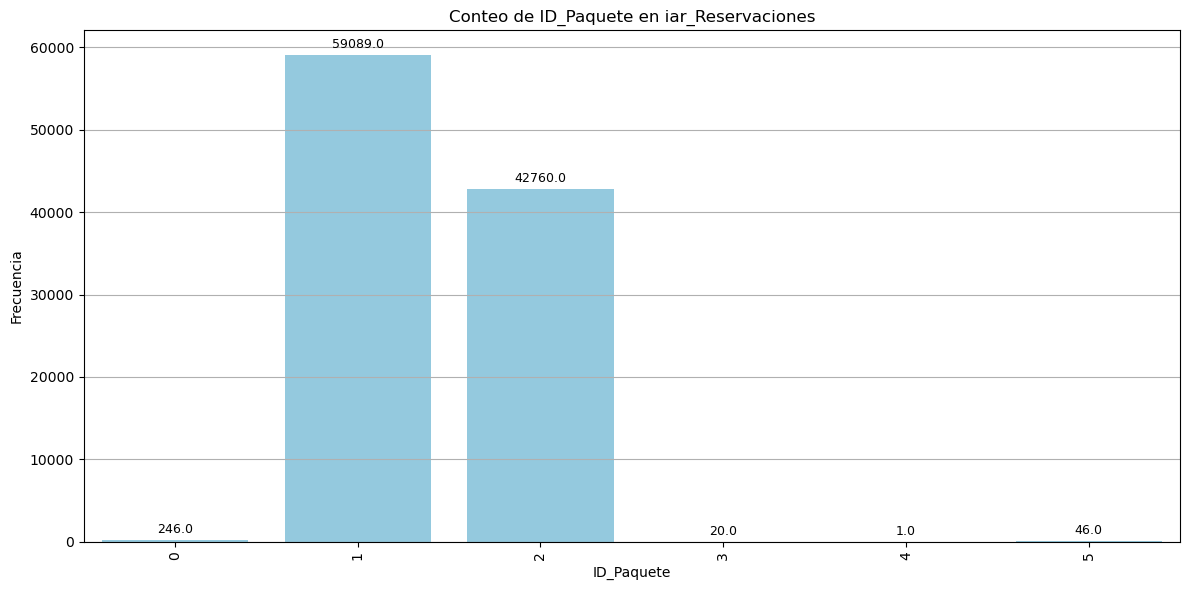

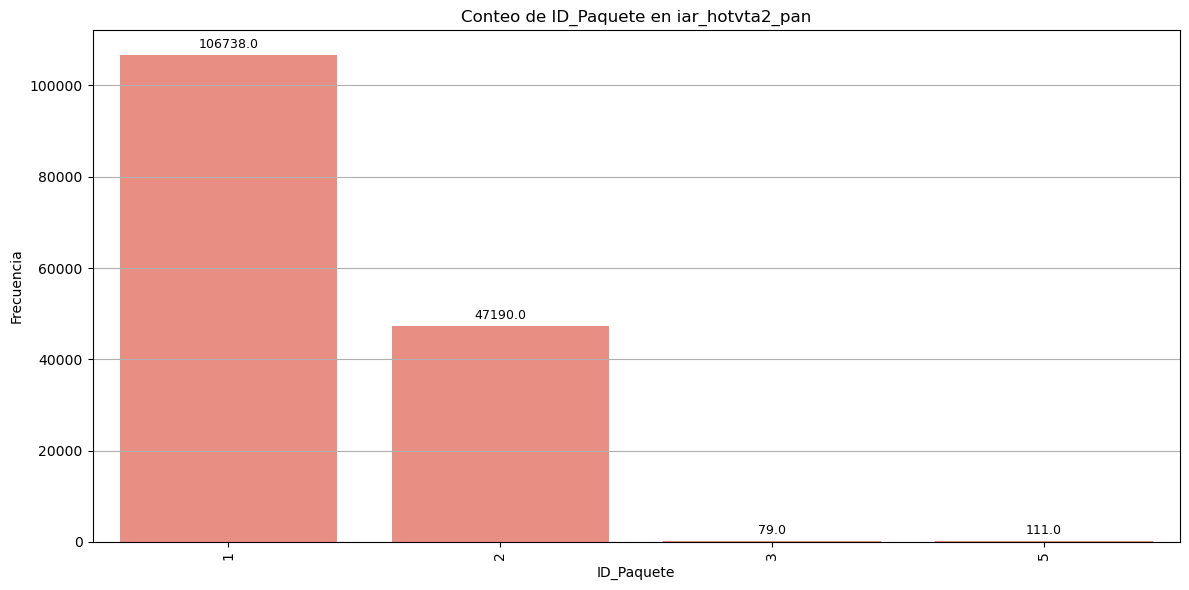

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Countplot para iar_Reservaciones ===
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=iar_Reservaciones, x='ID_Paquete', color='skyblue')

# Añadimos las etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title('Conteo de ID_Paquete en iar_Reservaciones')
plt.xlabel('ID_Paquete')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Countplot para iar_hotvta2_pan ===
plt.figure(figsize=(12, 6))
ax2 = sns.countplot(data=iar_hotvta2_pan, x='ID_Paquete', color='salmon')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title('Conteo de ID_Paquete en iar_hotvta2_pan')
plt.xlabel('ID_Paquete')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



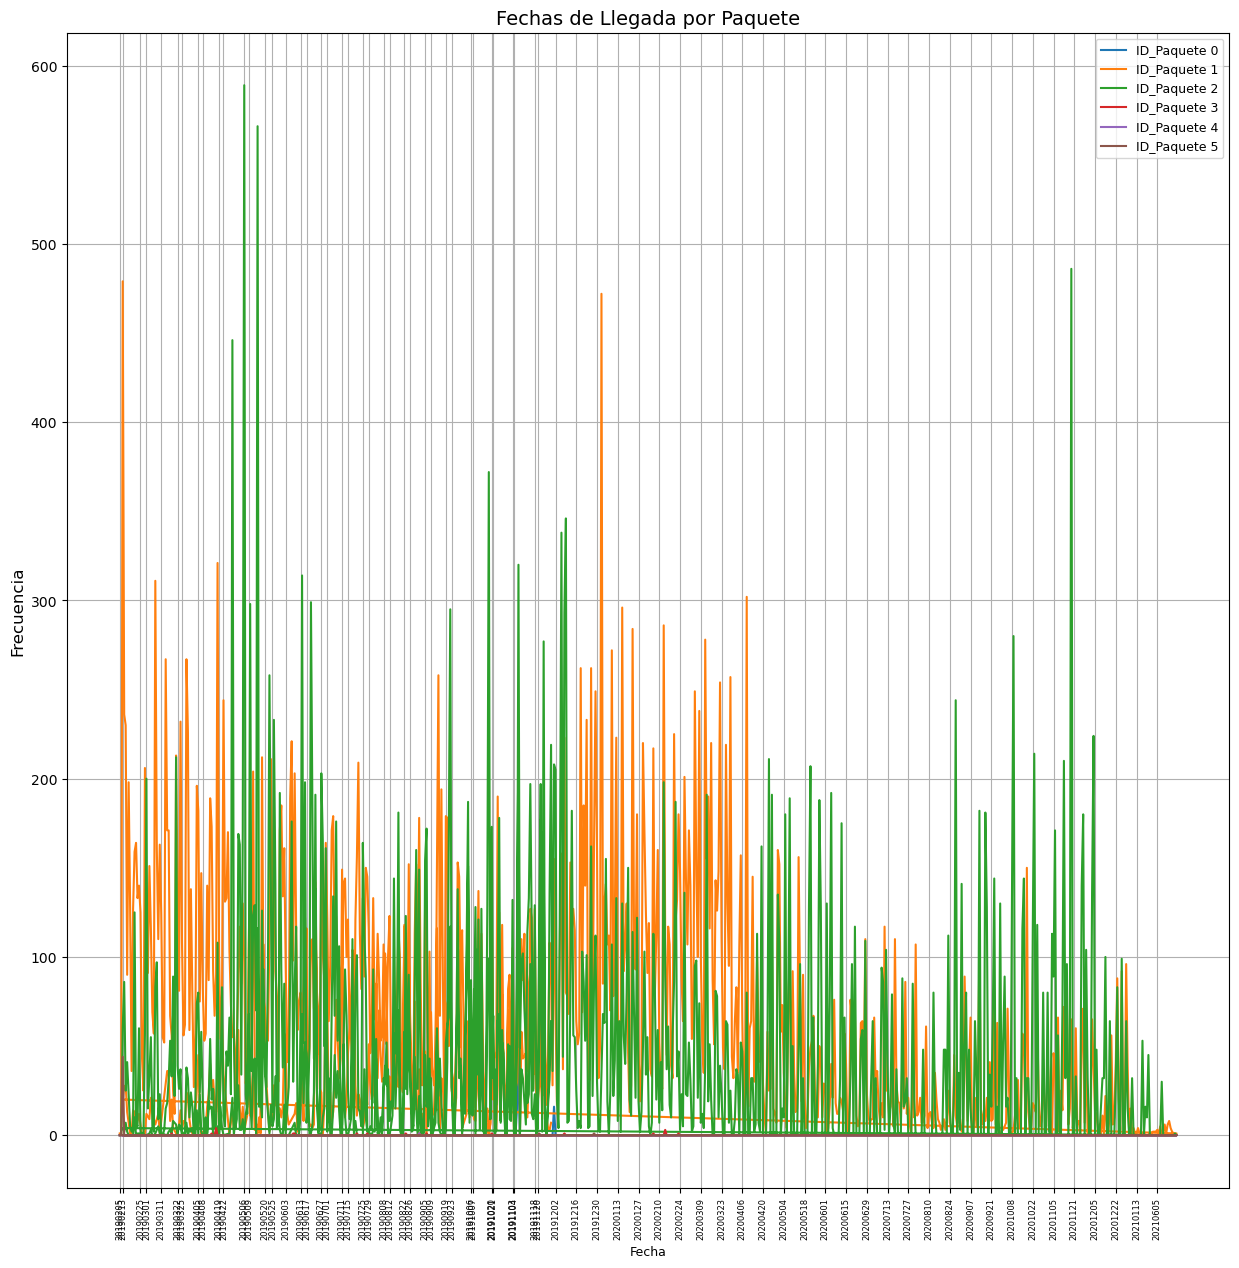

In [25]:
tab = tablas["h_fec_lld"]
plt.figure(figsize=(15, 15))

for id_paquete in tab.index:
    plt.plot(tab.columns, tab.loc[id_paquete], label=f'ID_Paquete {id_paquete}')

plt.xlabel('Fecha', fontsize=9)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Fechas de Llegada por Paquete', fontsize=14)

plt.xticks(
    ticks=tab.columns[::14],  # <-- Cada 7 fechas
    labels=tab.columns[::14], 
    rotation=90,
    fontsize=6
)

plt.yticks(fontsize=10)
plt.legend(fontsize=9)
plt.grid(True)
#plt.tight_layout()
plt.show()

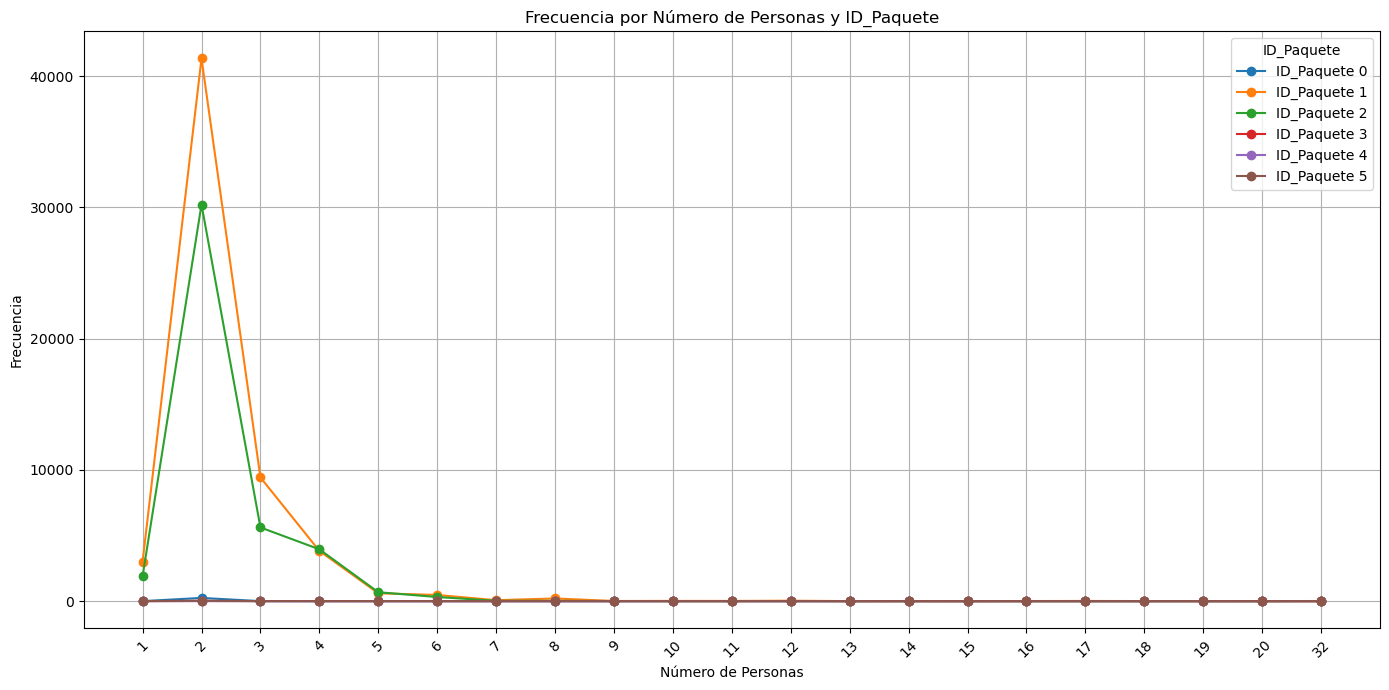

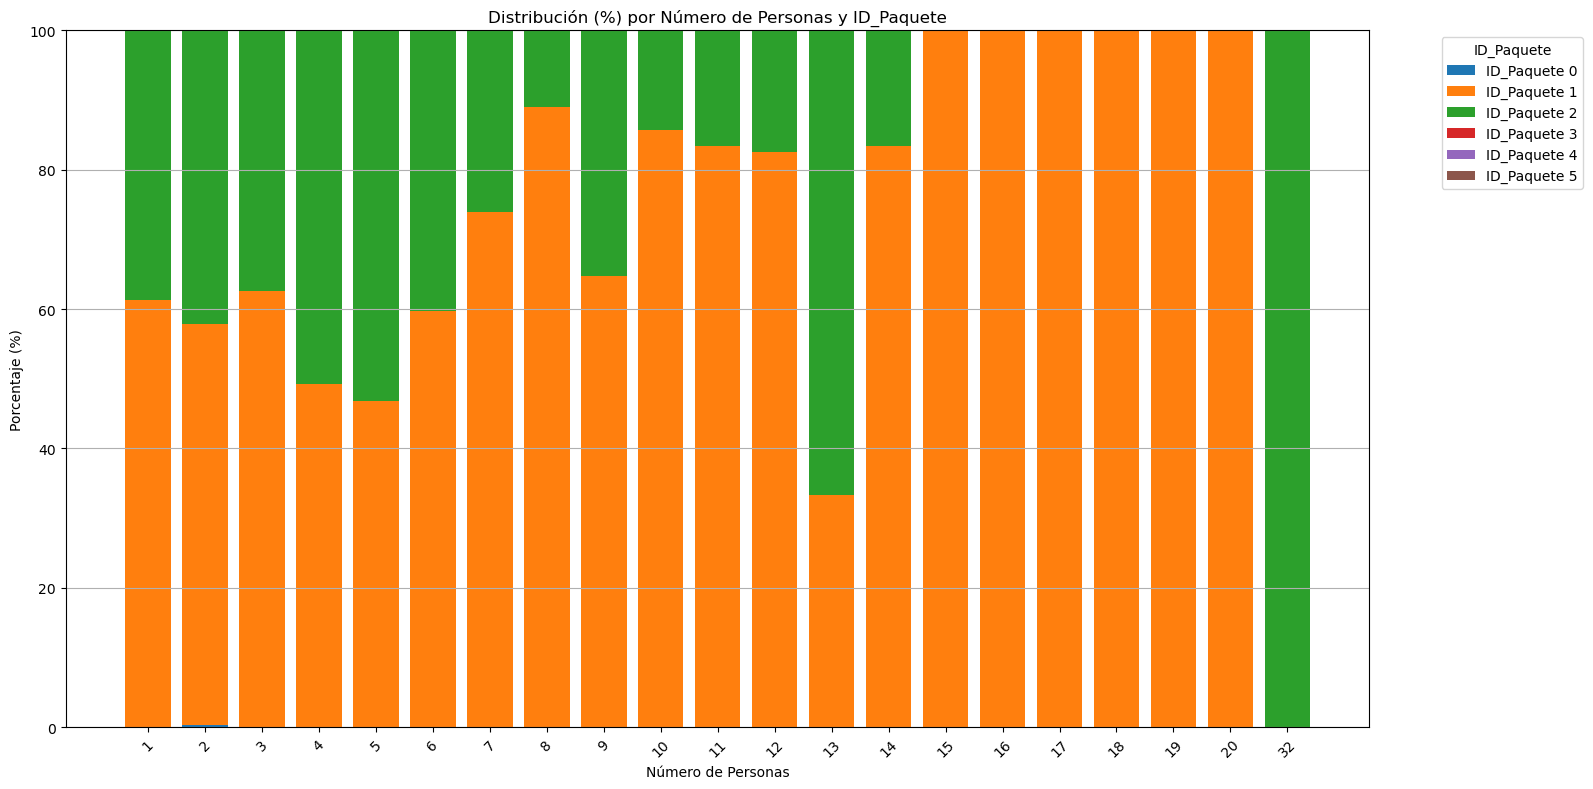

In [26]:
tab = tablas["h_num_per"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Número de Personas y ID_Paquete')
plt.xlabel('Número de Personas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["h_num_per"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Número de Personas y ID_Paquete')
plt.xlabel('Número de Personas')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

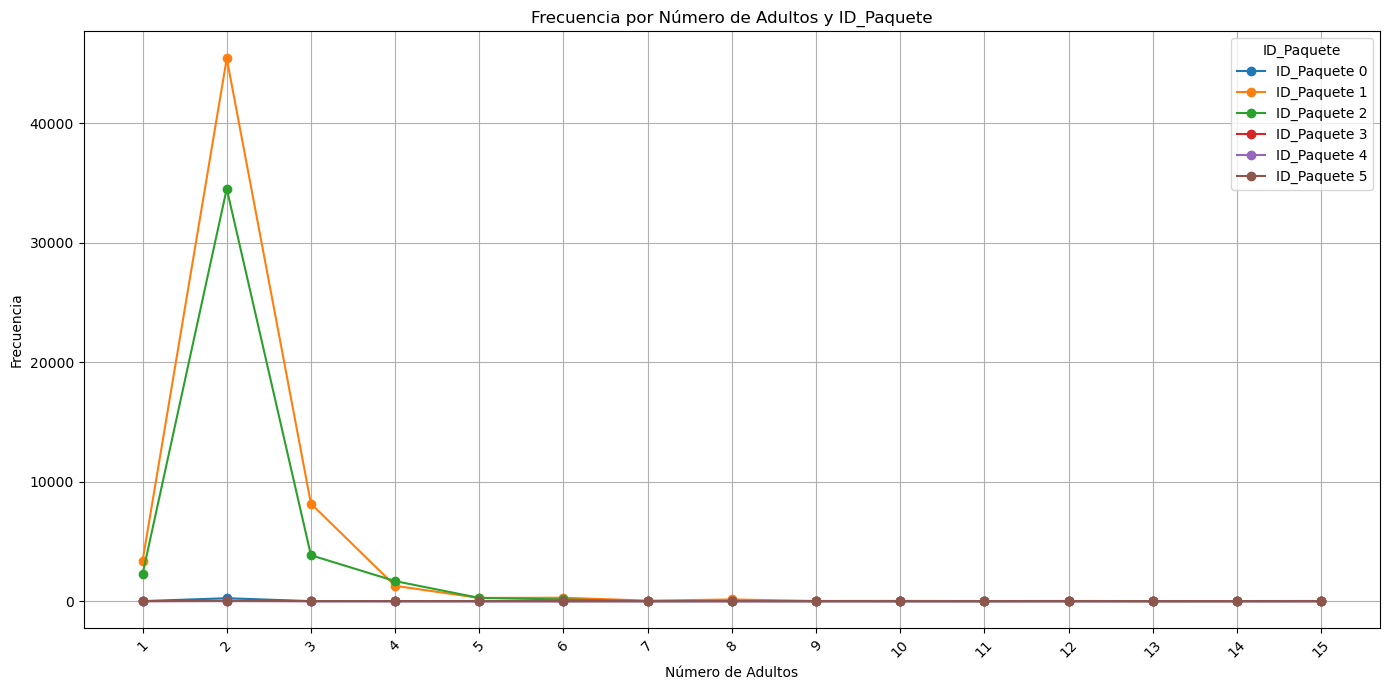

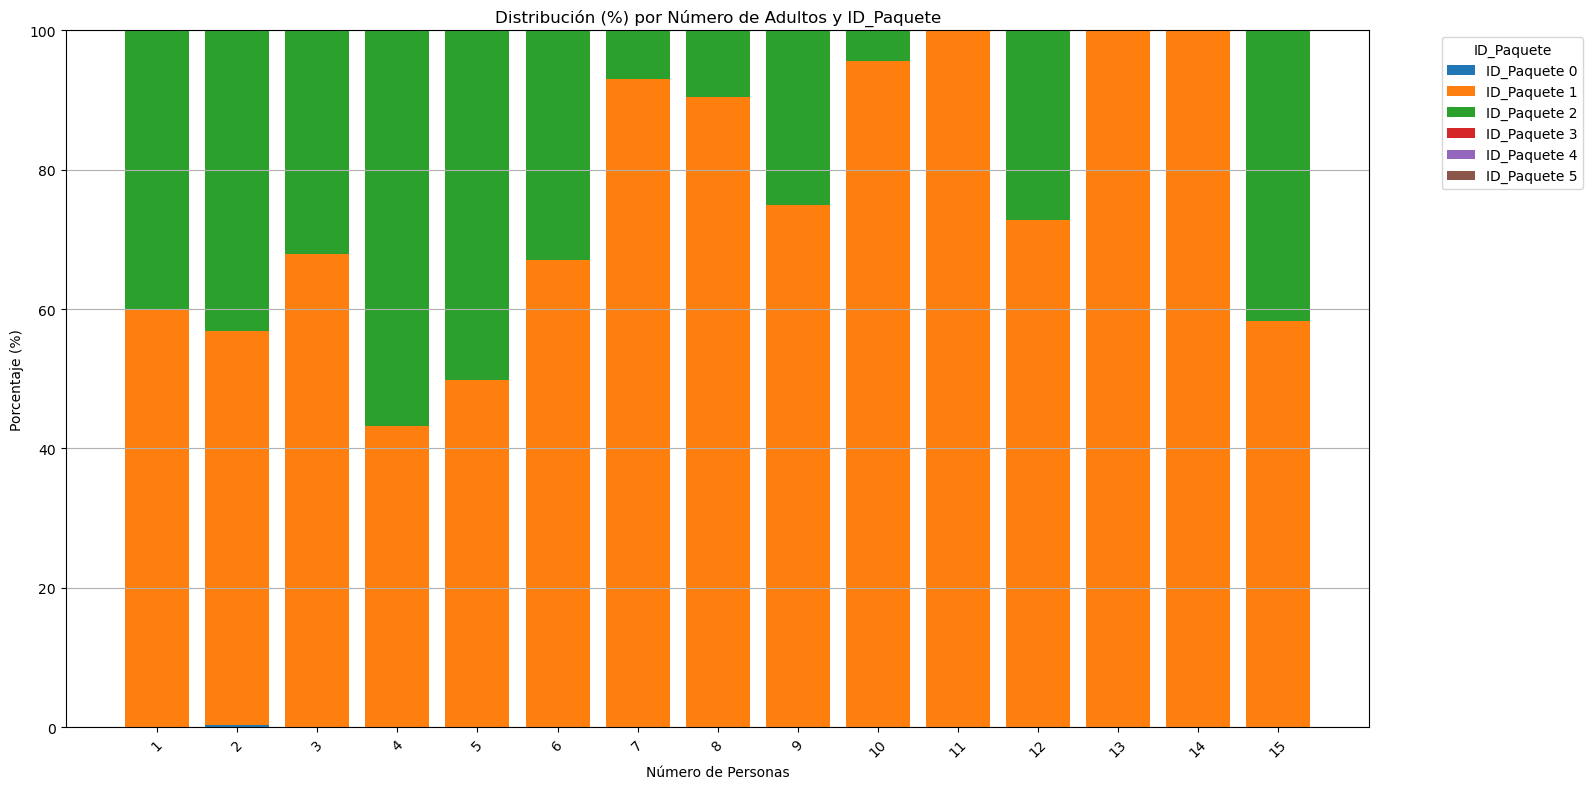

In [27]:
tab = tablas["h_num_adu"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Número de Adultos y ID_Paquete')
plt.xlabel('Número de Adultos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["h_num_adu"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Número de Adultos y ID_Paquete')
plt.xlabel('Número de Personas')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

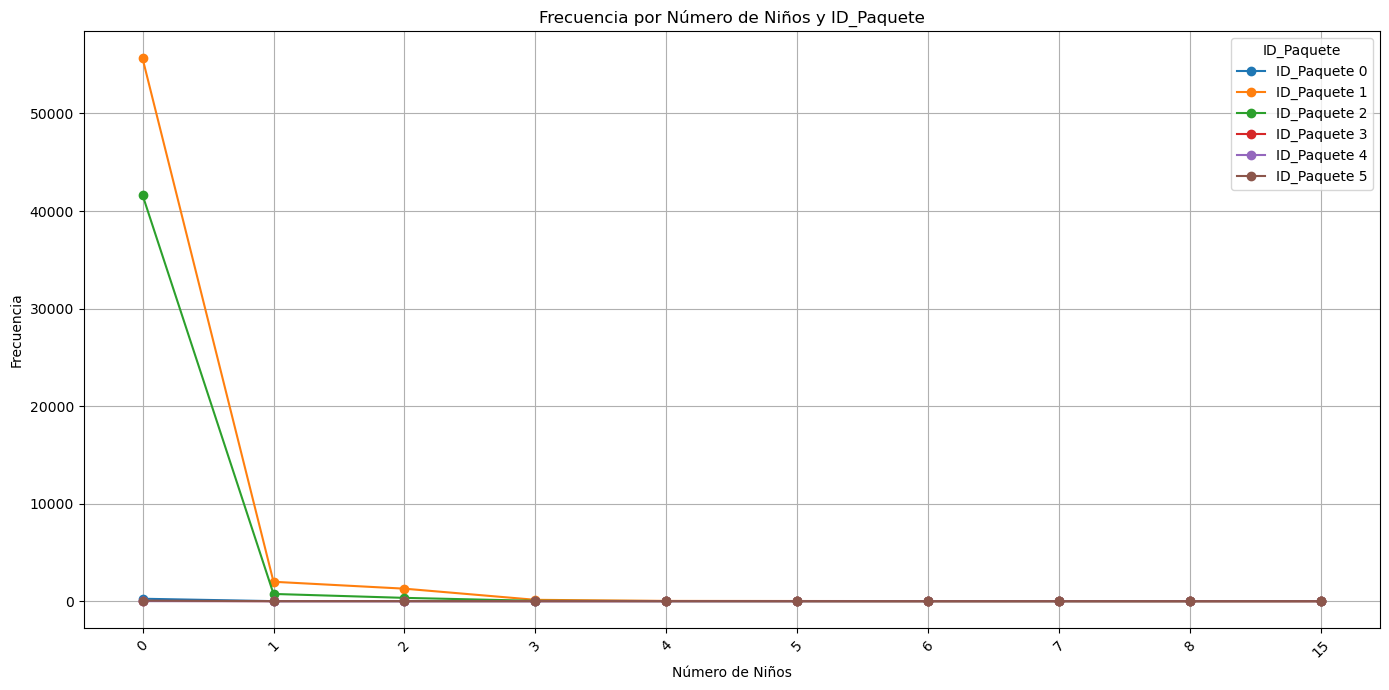

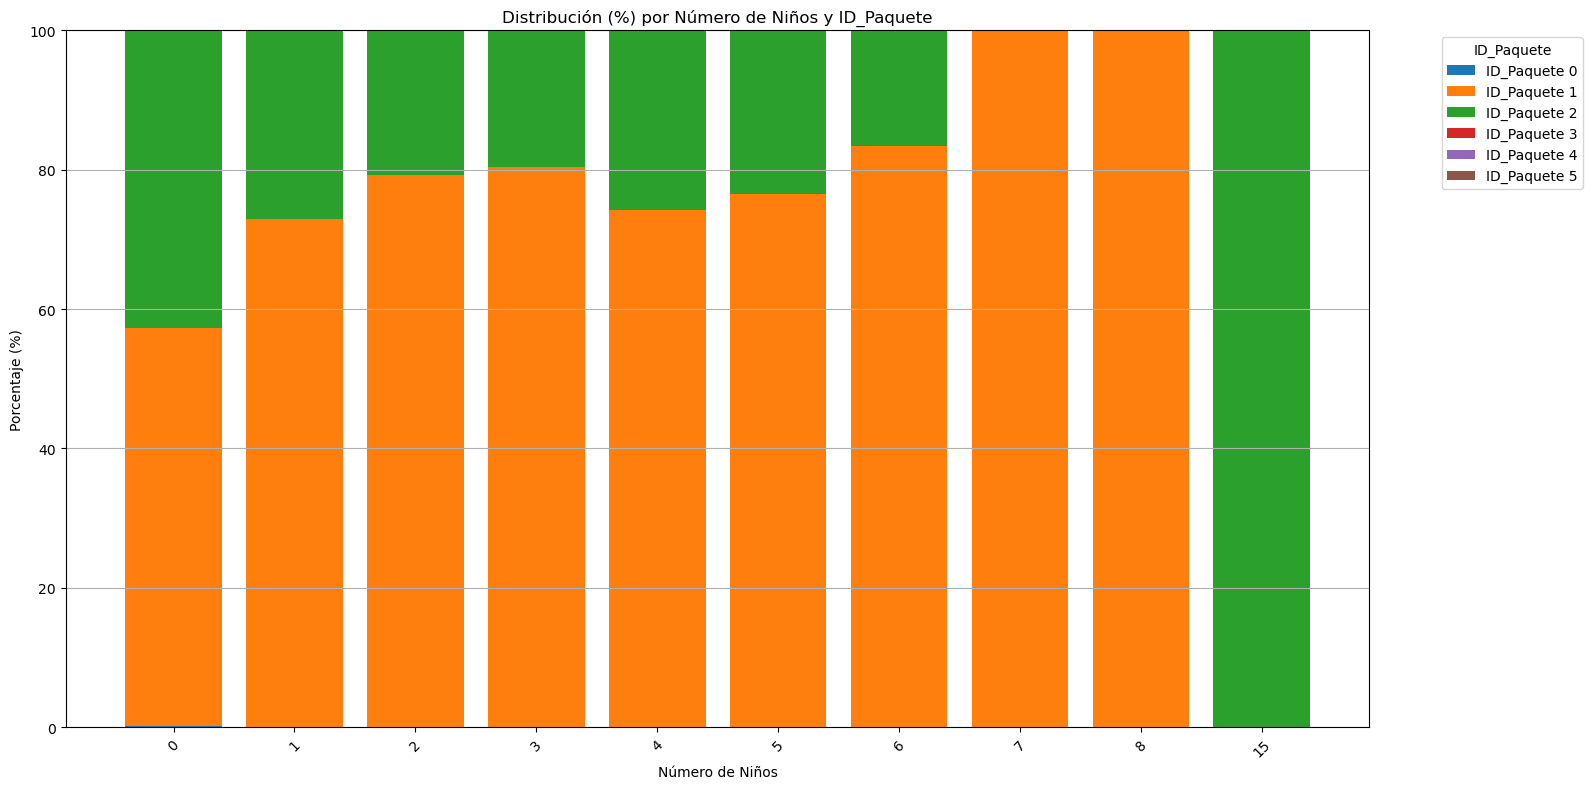

In [28]:
tab= tablas["h_num_men"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Número de Niños y ID_Paquete')
plt.xlabel('Número de Niños')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["h_num_men"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Número de Niños y ID_Paquete')
plt.xlabel('Número de Niños')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

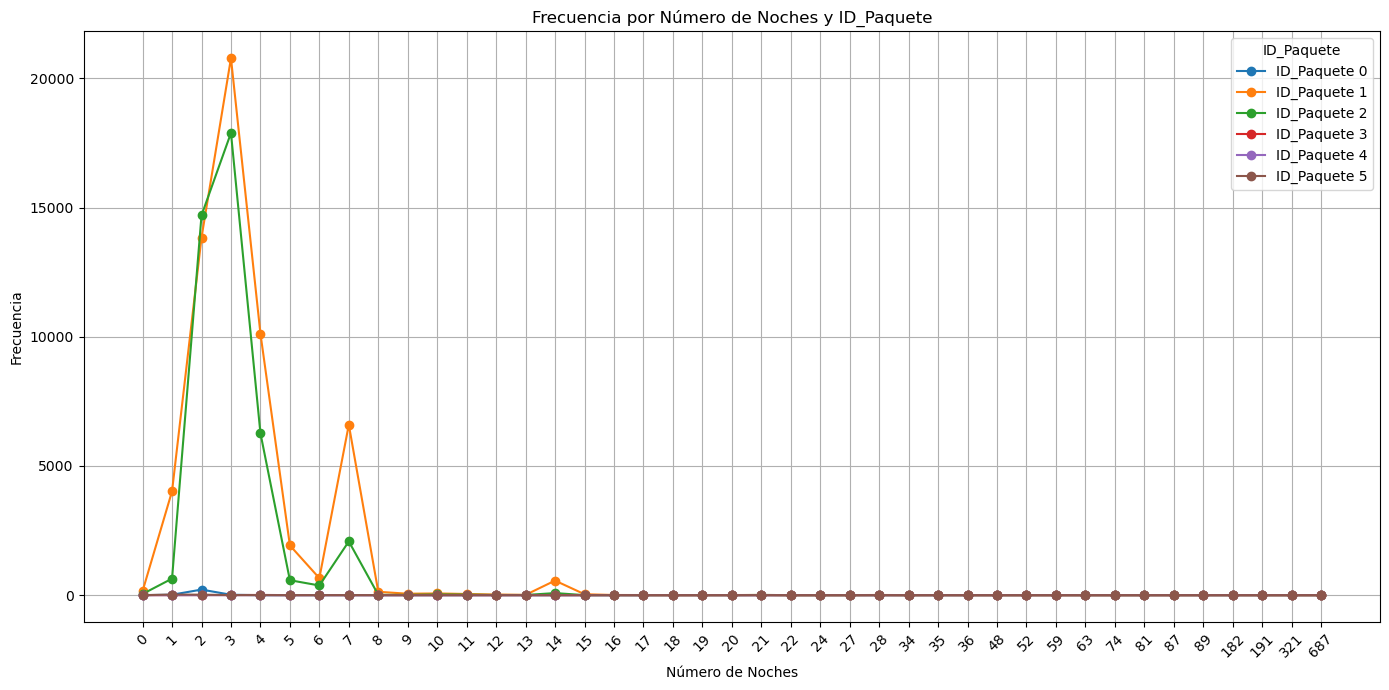

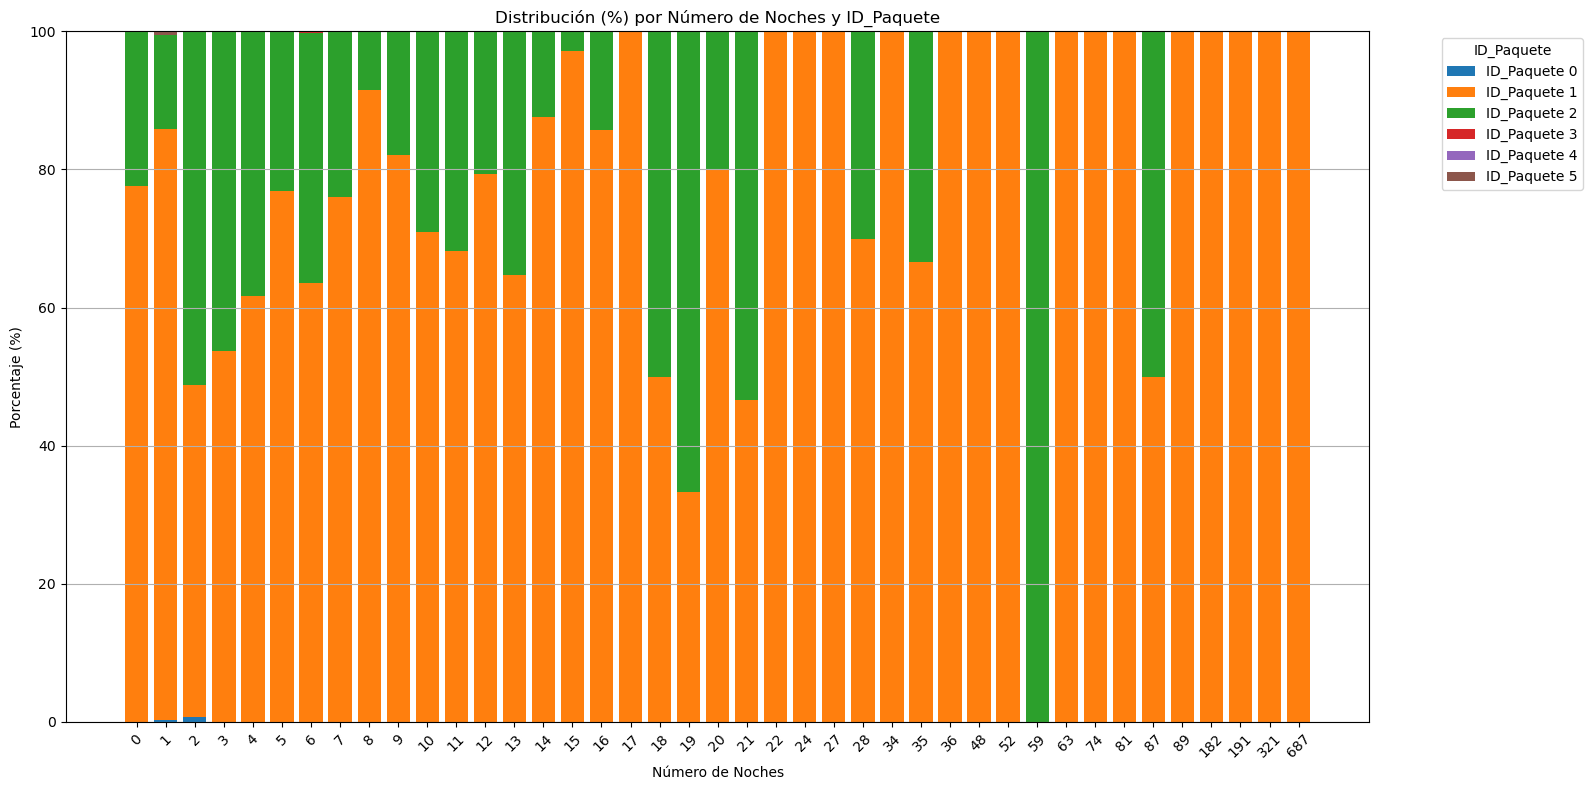

In [29]:
tab= tablas["h_num_noc"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Número de Noches y ID_Paquete')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["h_num_noc"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Número de Noches y ID_Paquete')
plt.xlabel('Número de Noches')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

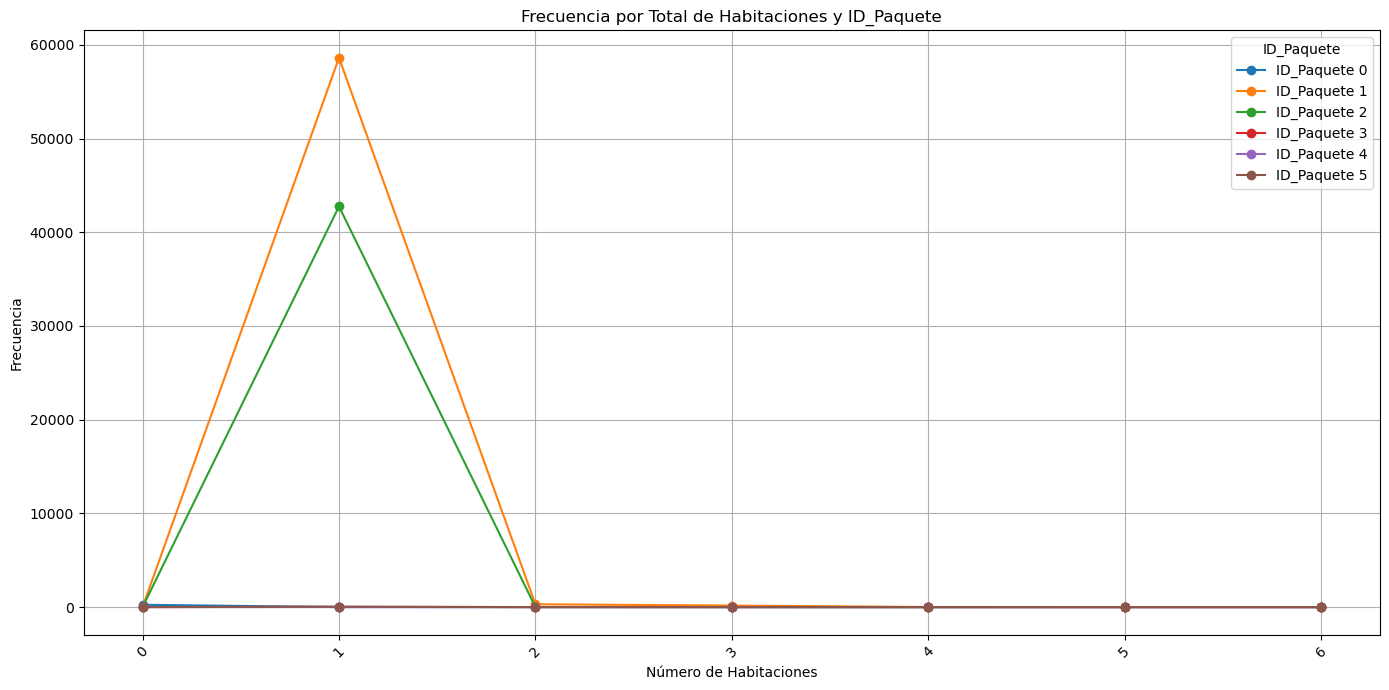

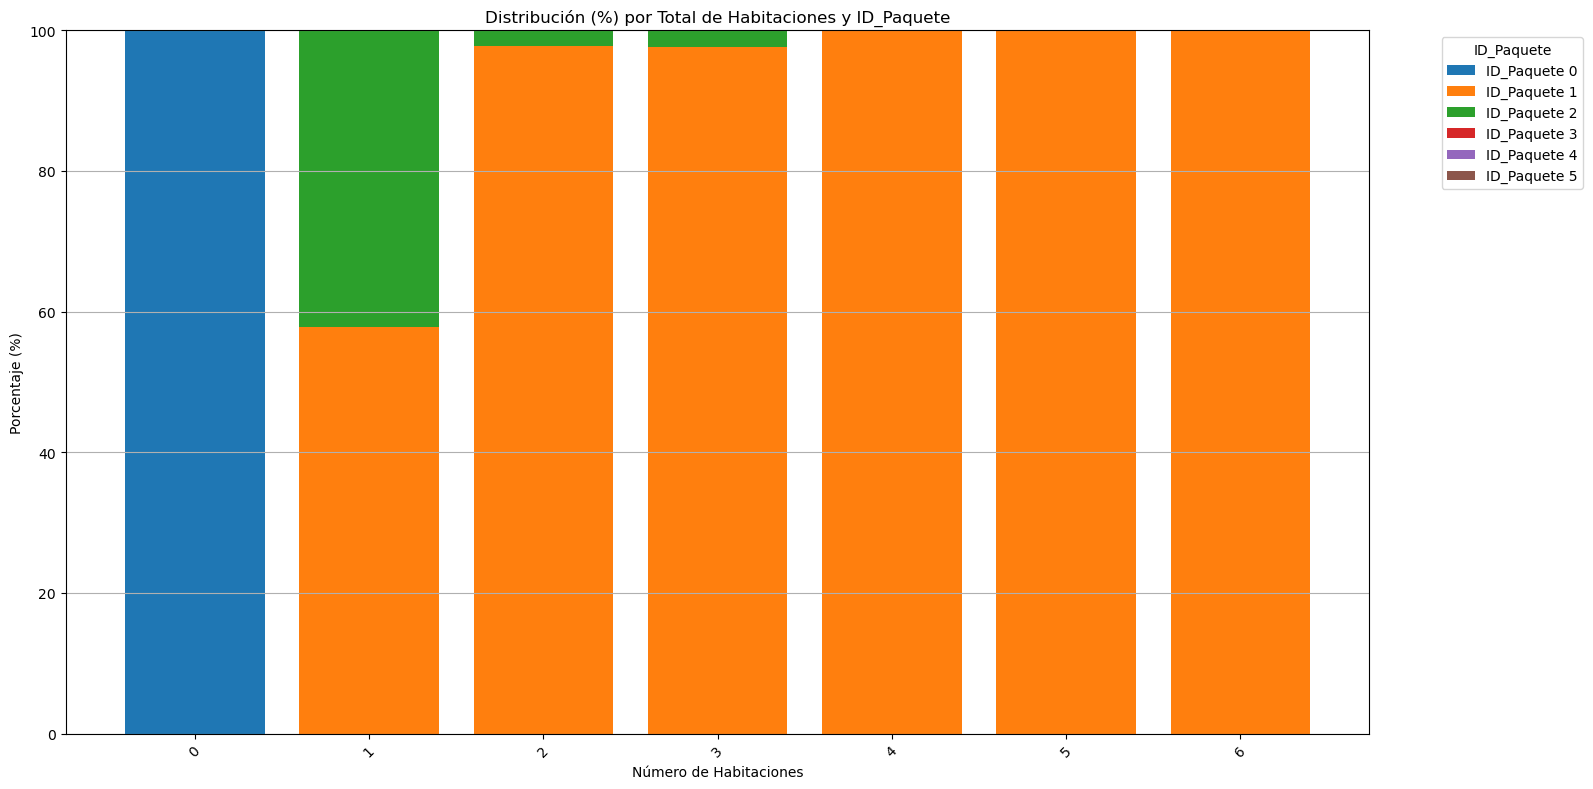

In [30]:
tab= tablas["h_tot_hab"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Total de Habitaciones y ID_Paquete')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["h_tot_hab"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Total de Habitaciones y ID_Paquete')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

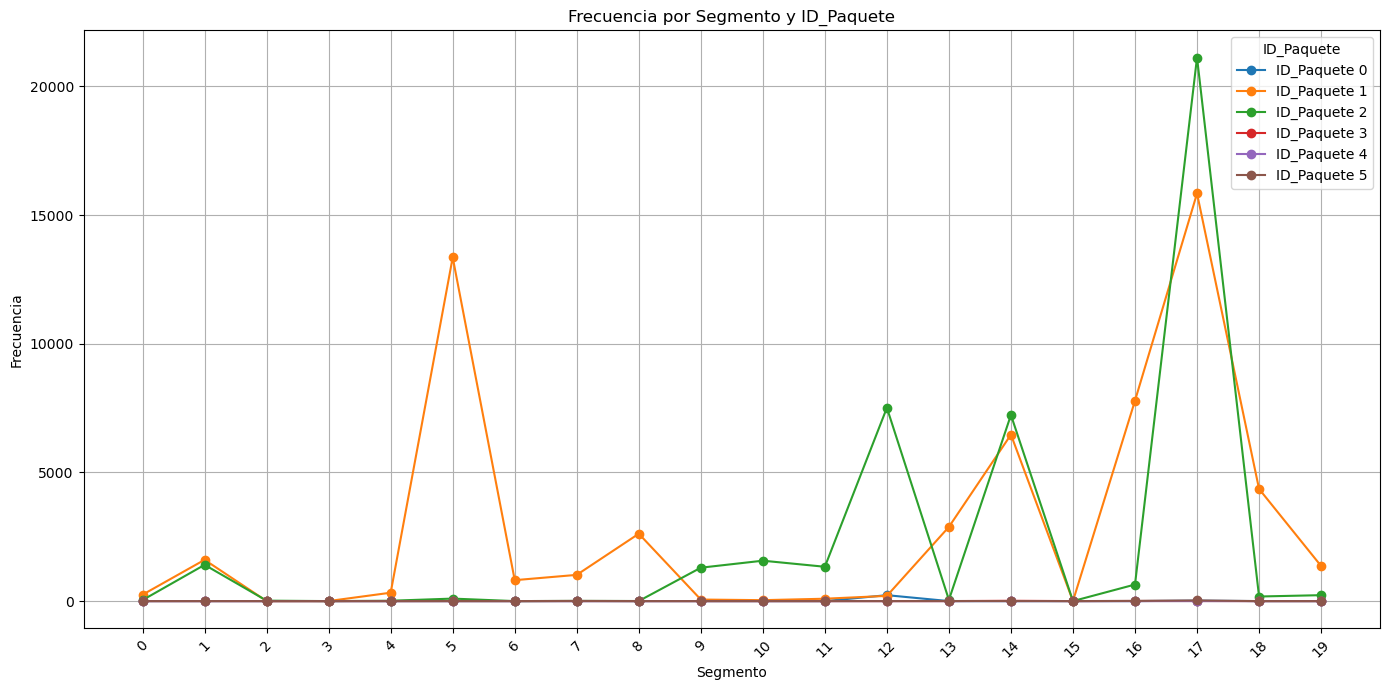

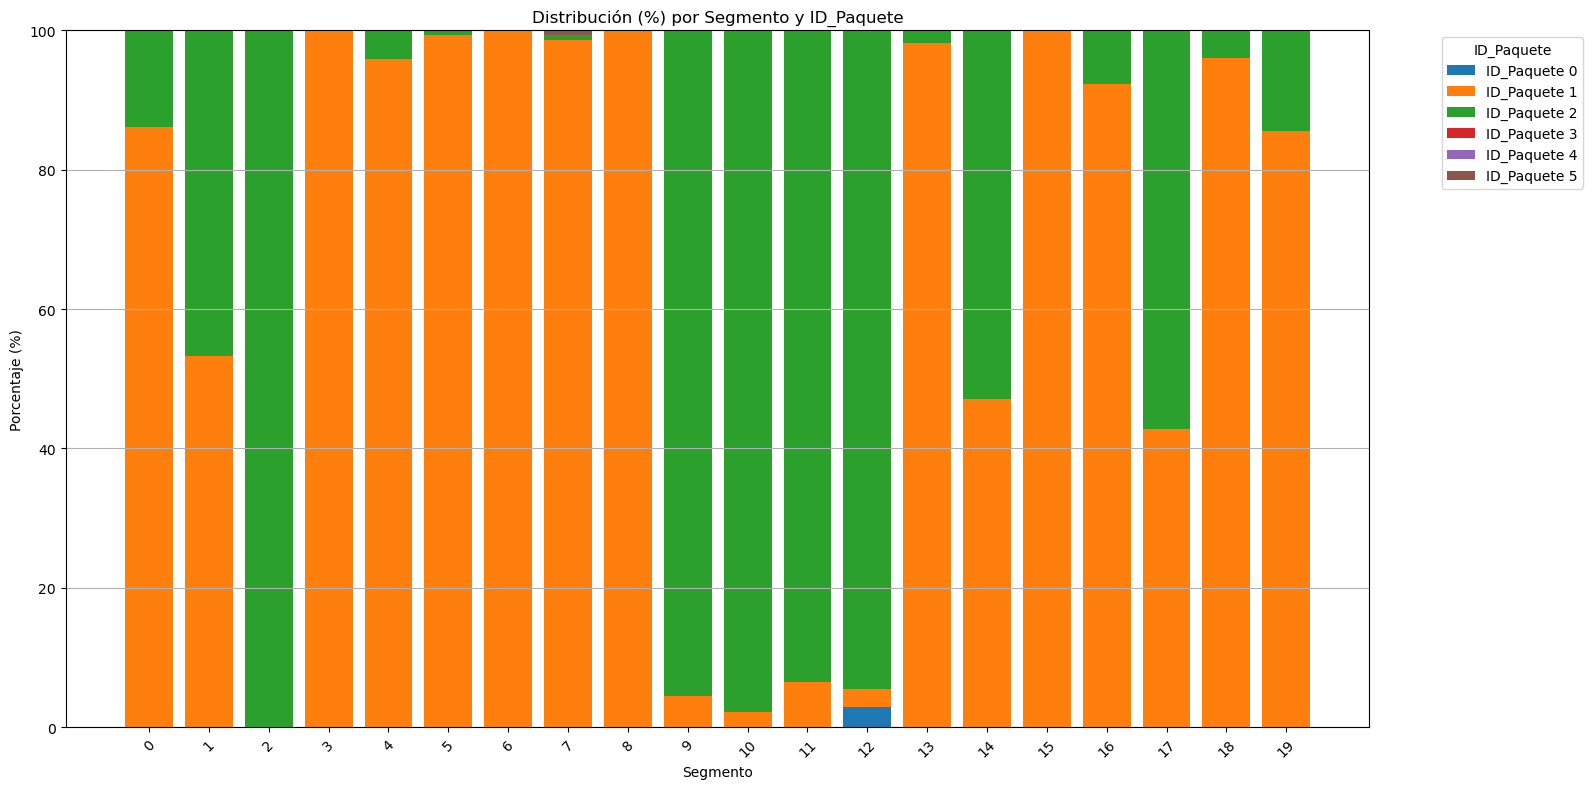

In [31]:
tab= tablas["ID_Segmento_Comp"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Segmento y ID_Paquete')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["ID_Segmento_Comp"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Segmento y ID_Paquete')
plt.xlabel('Segmento')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

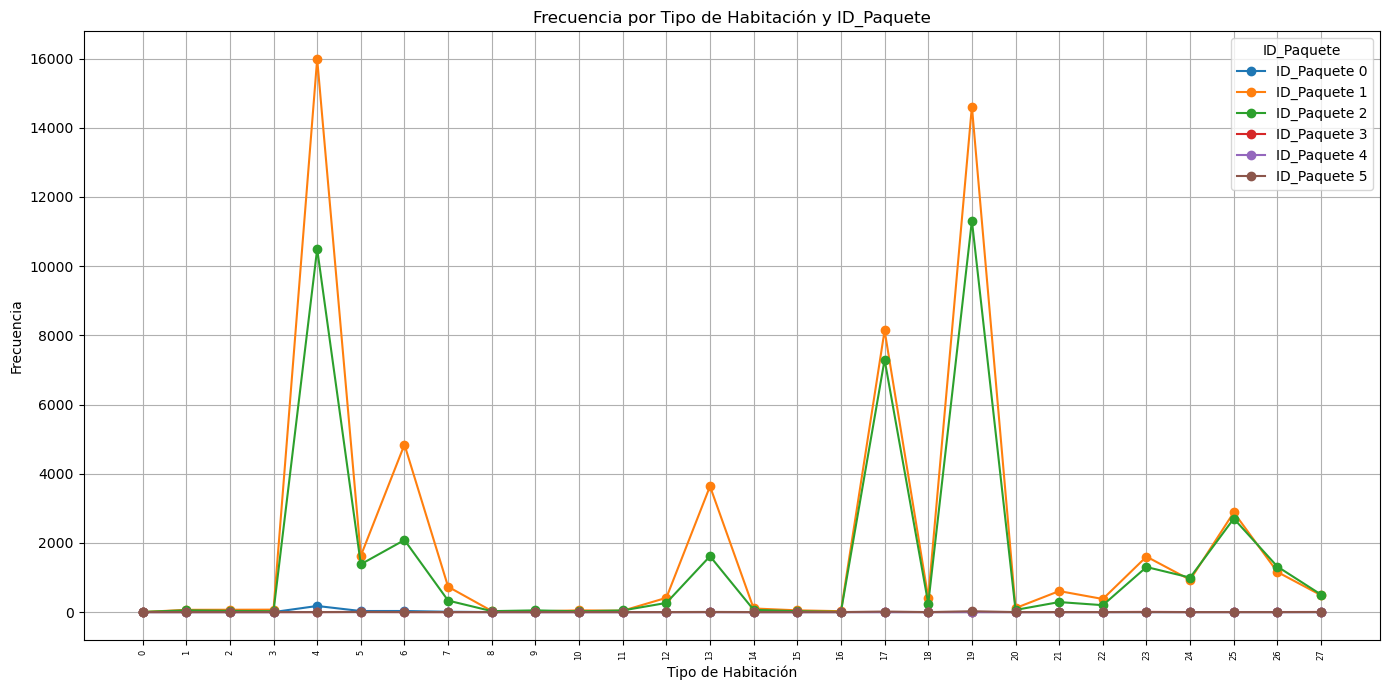

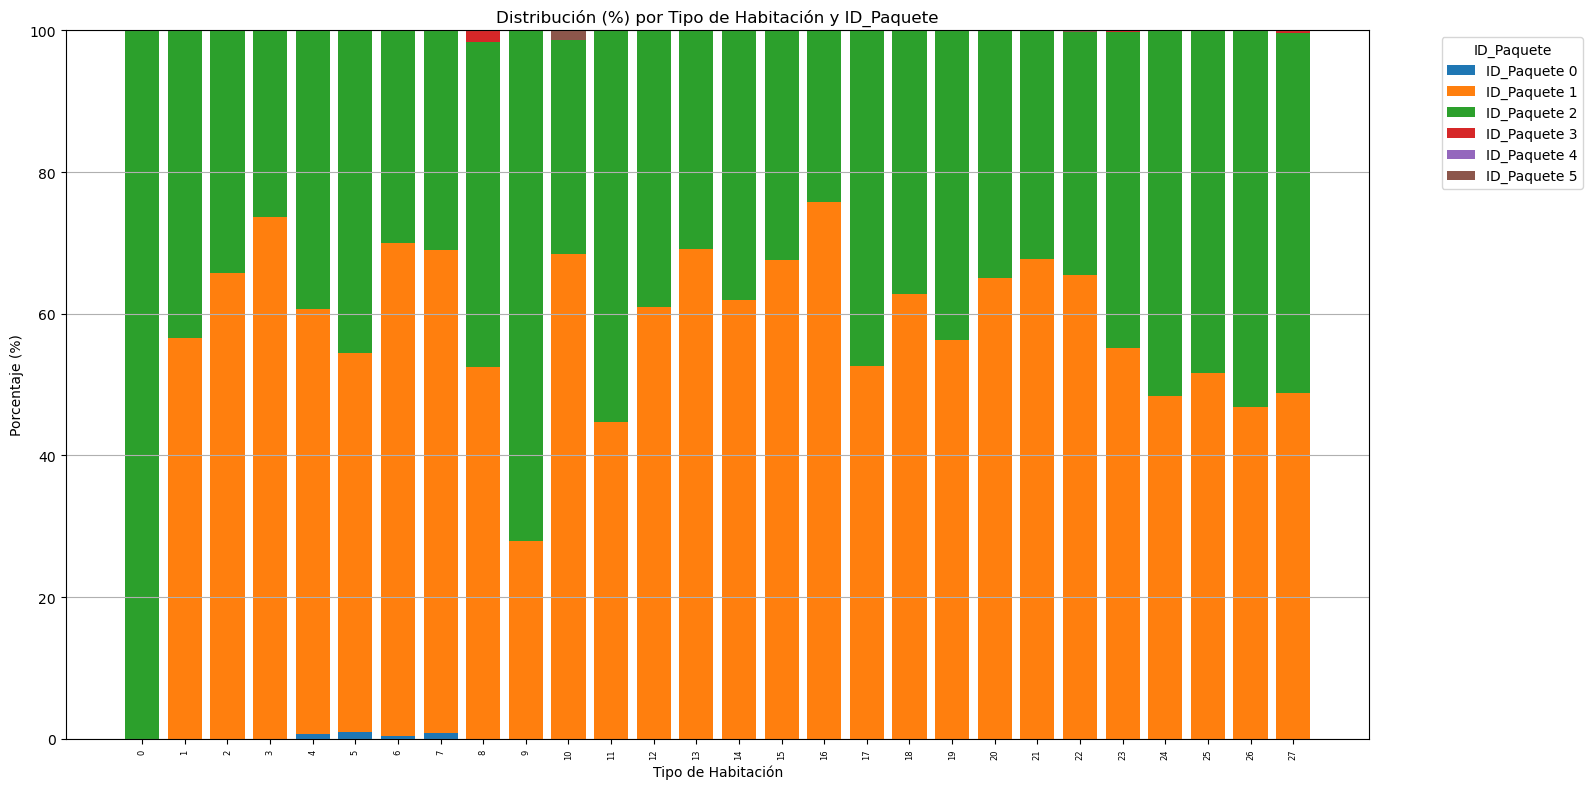

In [32]:
tab = tablas["ID_Tipo_Habitacion"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Tipo de Habitación y ID_Paquete')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)  # <= aquí añadimos fontsize
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["ID_Tipo_Habitacion"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Tipo de Habitación y ID_Paquete')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)  # <= también aquí
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


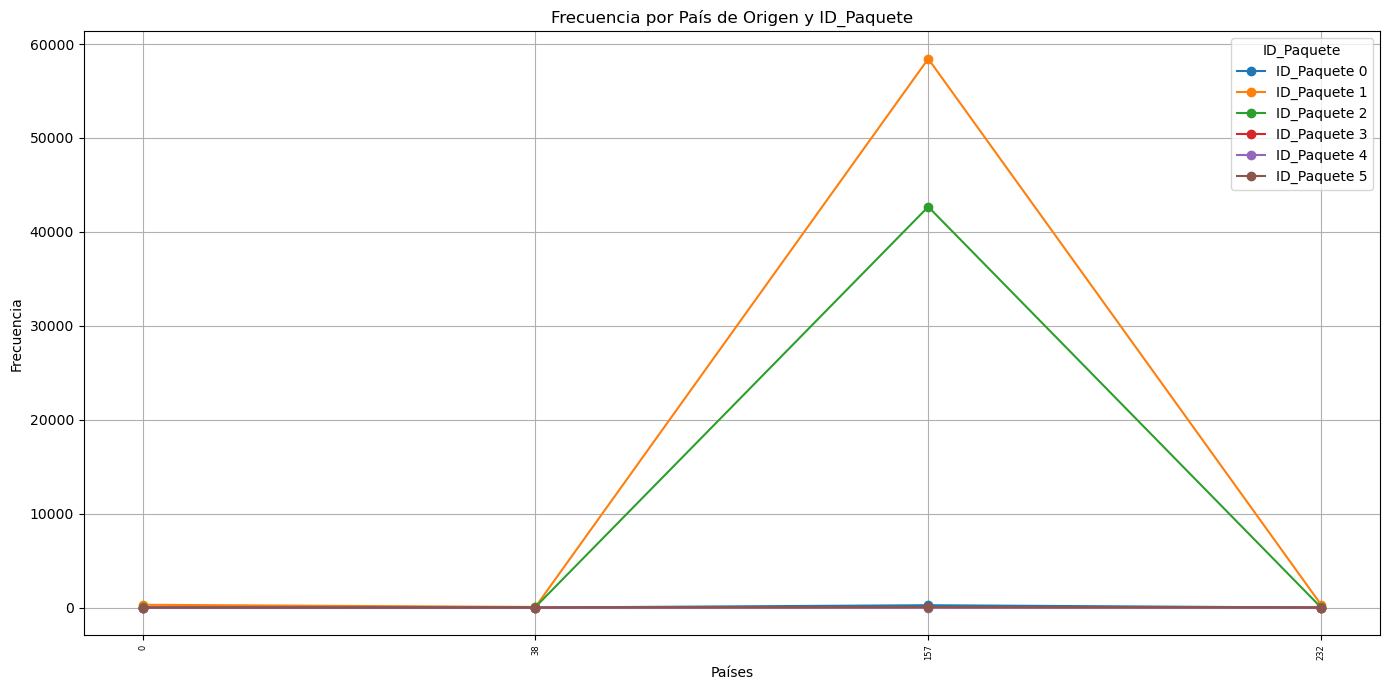

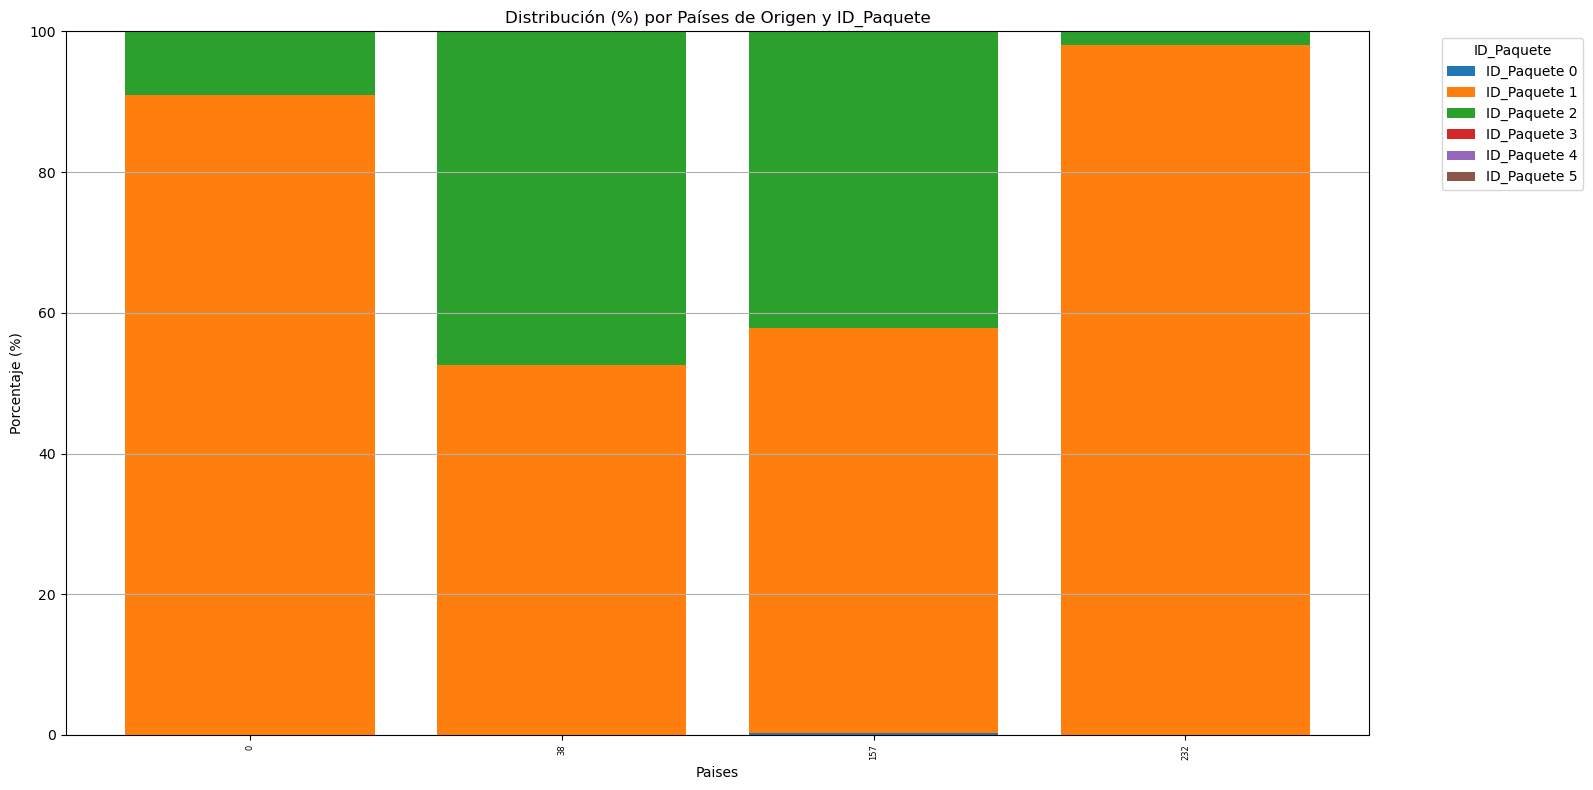

In [33]:
tab = tablas["ID_Pais_Origen"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por País de Origen y ID_Paquete')
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)  # <= aquí añadimos fontsize
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas["ID_Pais_Origen"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Países de Origen y ID_Paquete')
plt.xlabel('Paises')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)  # <= también aquí
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

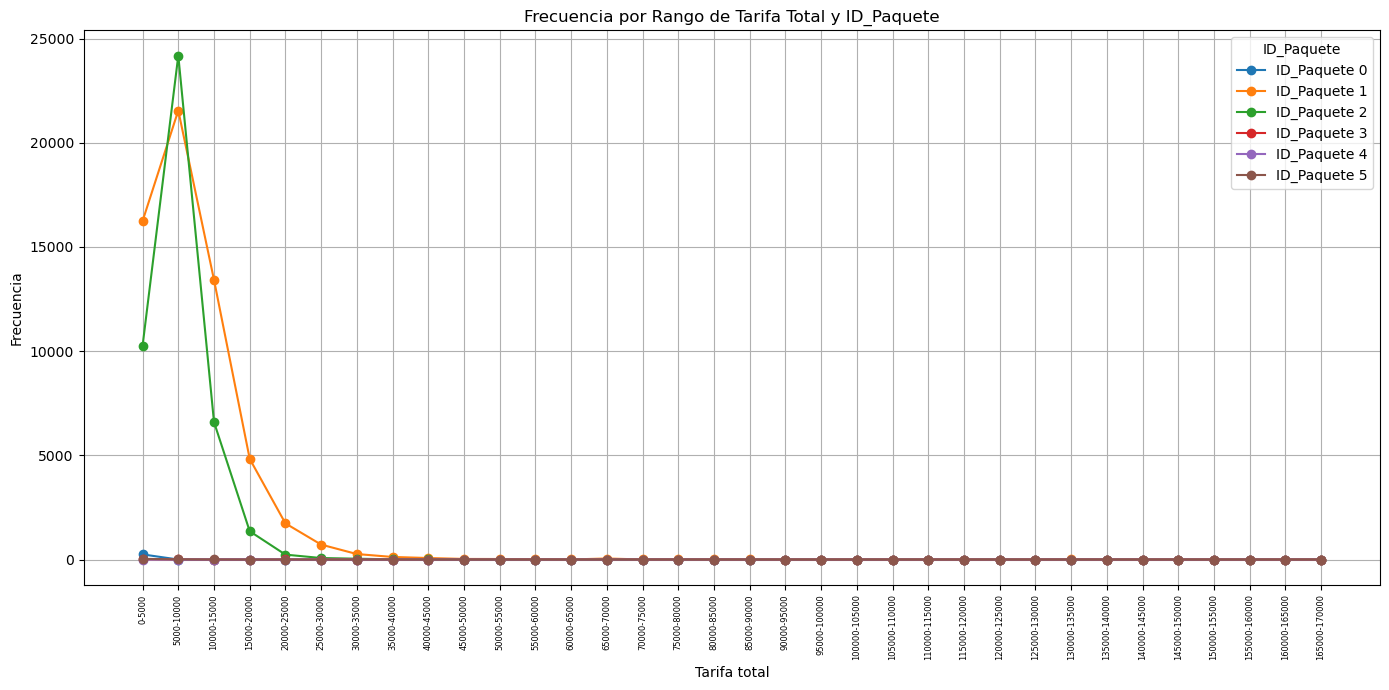

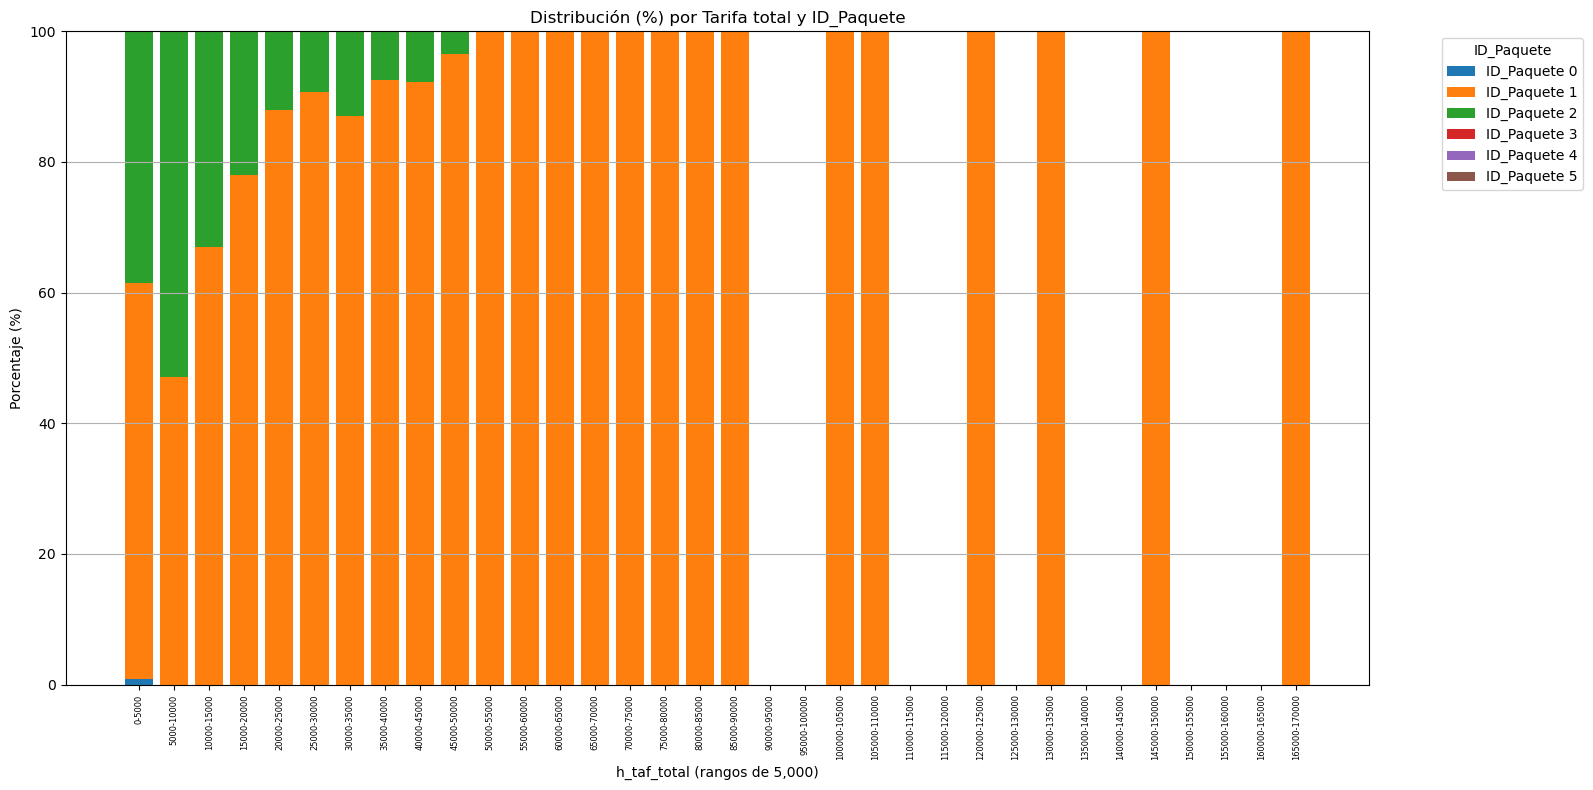

In [34]:
import numpy as np
tab = tablas["h_tfa_total"]
bins = np.arange(0, tab.columns.astype(float).max() + 5000, 5000)
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
bin_mapping = pd.cut(tab.columns.astype(float), bins=bins, labels=labels, right=False)
tab.columns = bin_mapping
tab = tab.groupby(axis=1, level=0).sum()
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Rango de Tarifa Total y ID_Paquete')
plt.xlabel('Tarifa total')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Tarifa total y ID_Paquete')
plt.xlabel('h_taf_total (rangos de 5,000)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


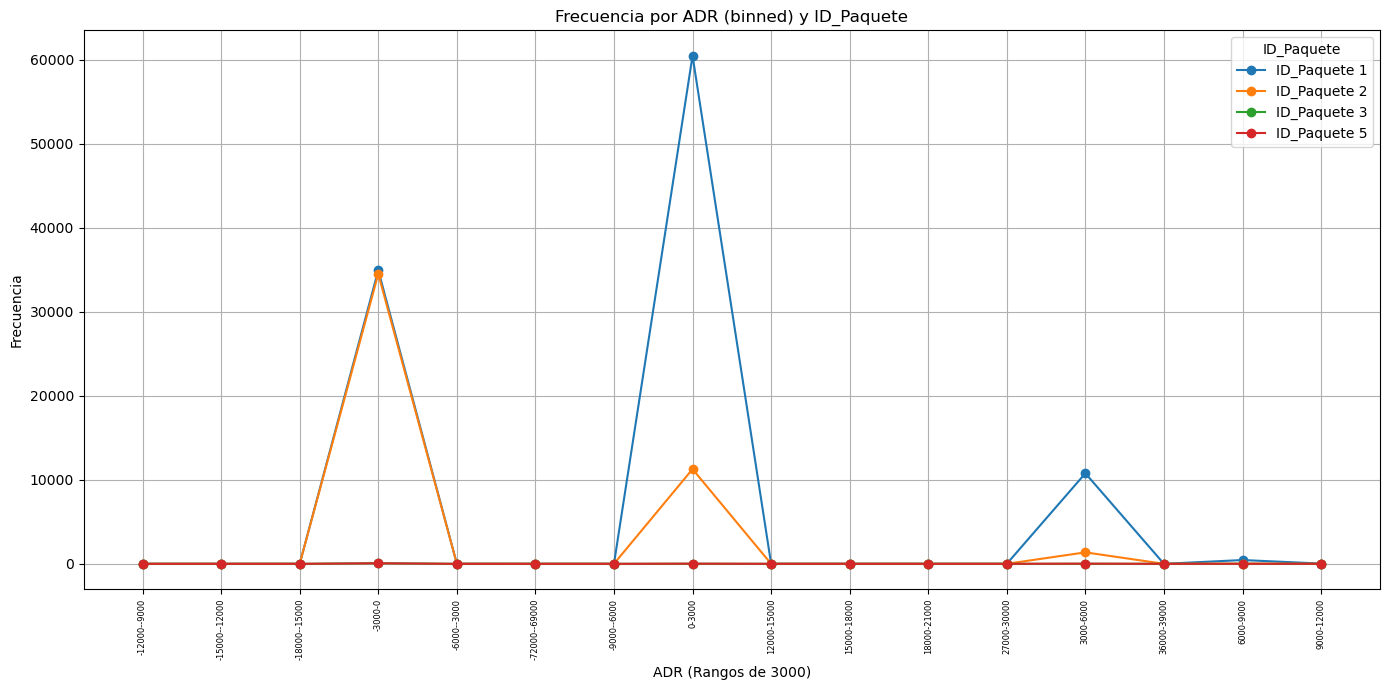

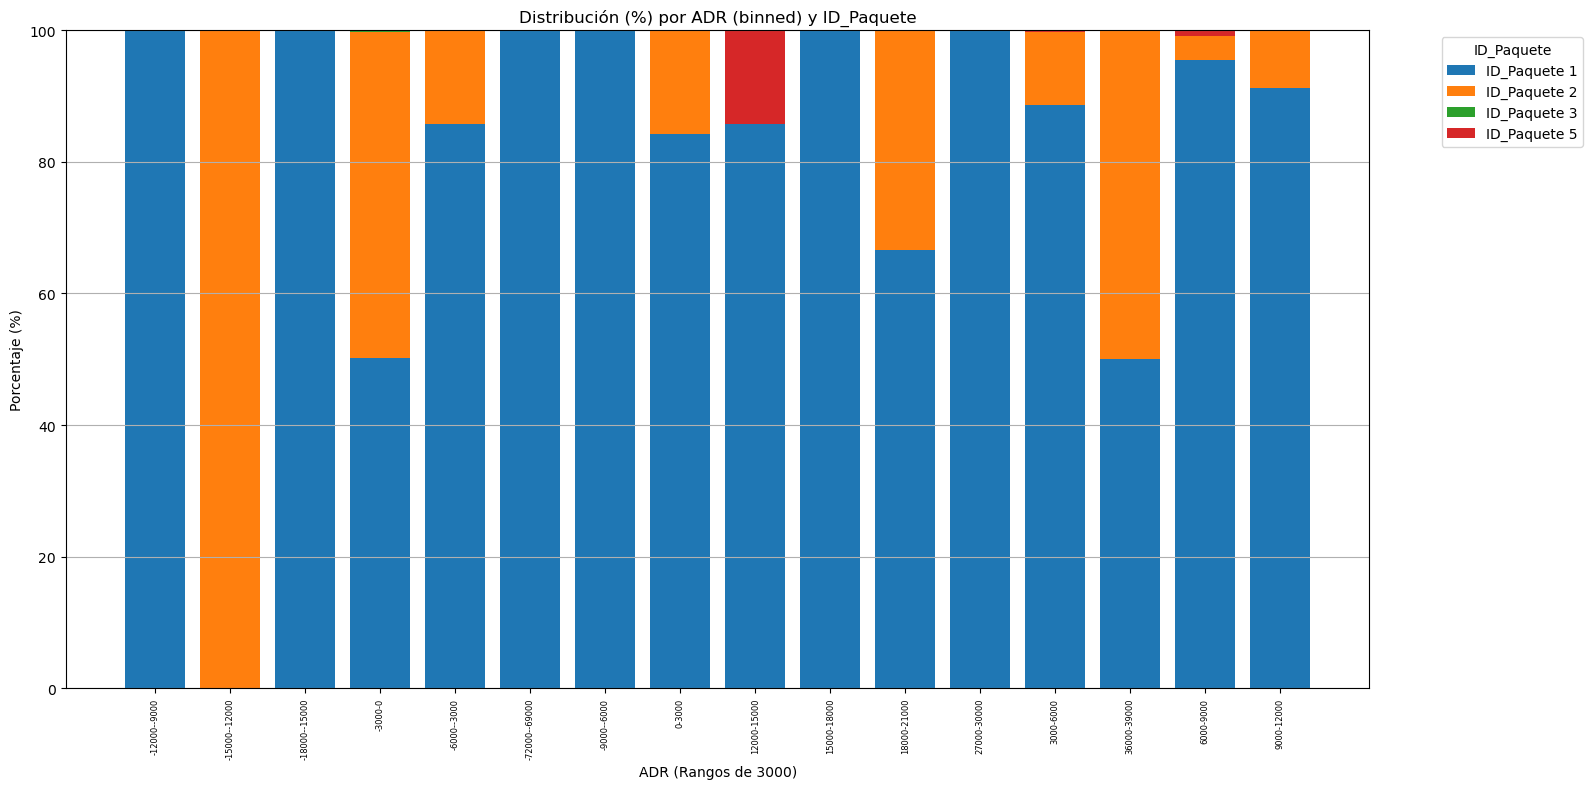

In [35]:
adr_cols = [float(x.strip('# ')) for x in tablas2["ADR"].columns]
min_value = int(min(adr_cols))  # Puede ser negativo
max_value = int(max(adr_cols))
start = (min_value // 3000) * 3000
end = ((max_value // 3000) + 1) * 3000
bins = list(range(start, end + 3000, 3000))  # +3000 para incluir el último
bin_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
adr_bins = pd.cut(adr_cols, bins=bins, labels=bin_labels, include_lowest=True)
bin_mapping = dict(zip(tablas2["ADR"].columns, adr_bins))
tab_binned = tablas2["ADR"].copy()
tab_binned.columns = [bin_mapping[col] for col in tab_binned.columns]
tab_binned = tab_binned.groupby(level=0, axis=1).sum()
plt.figure(figsize=(14, 7))
for idx, row in tab_binned.iterrows():
    plt.plot(tab_binned.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por ADR (binned) y ID_Paquete')
plt.xlabel('ADR (Rangos de 3000)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tabla_percent = tab_binned.div(tab_binned.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por ADR (binned) y ID_Paquete')
plt.xlabel('ADR (Rangos de 3000)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


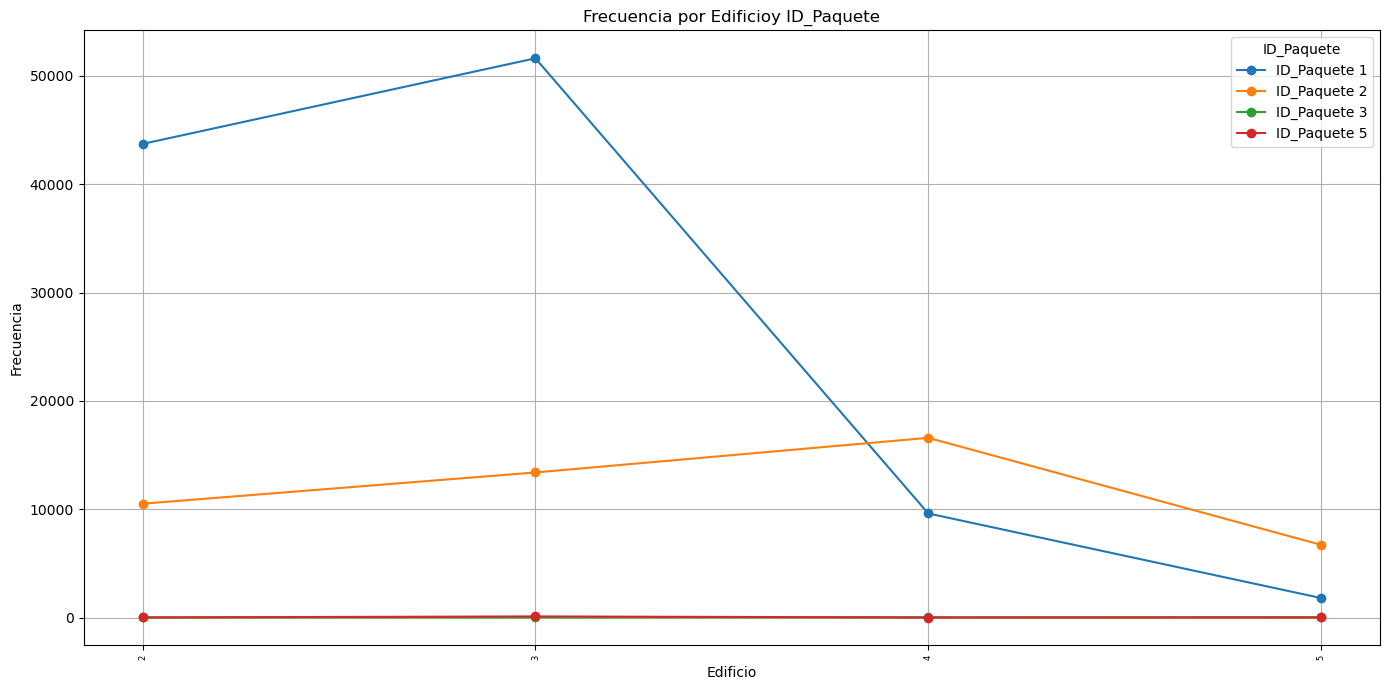

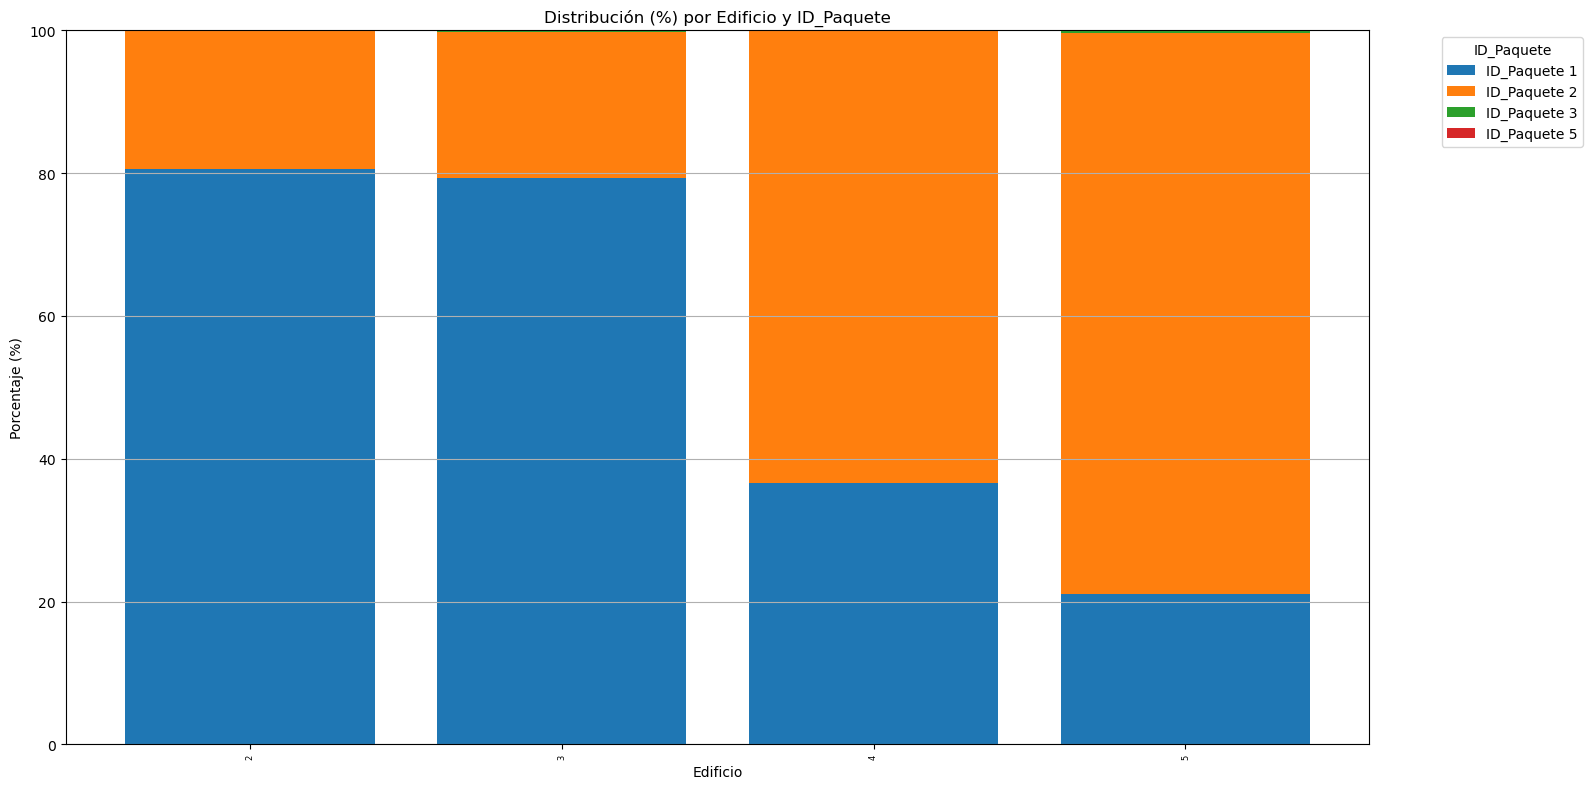

In [36]:
tab = tablas2["ID_edificio"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Edificioy ID_Paquete')
plt.xlabel("Edificio")
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)  # <= aquí añadimos fontsize
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas2["ID_edificio"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Edificio y ID_Paquete')
plt.xlabel('Edificio')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)  # <= también aquí
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

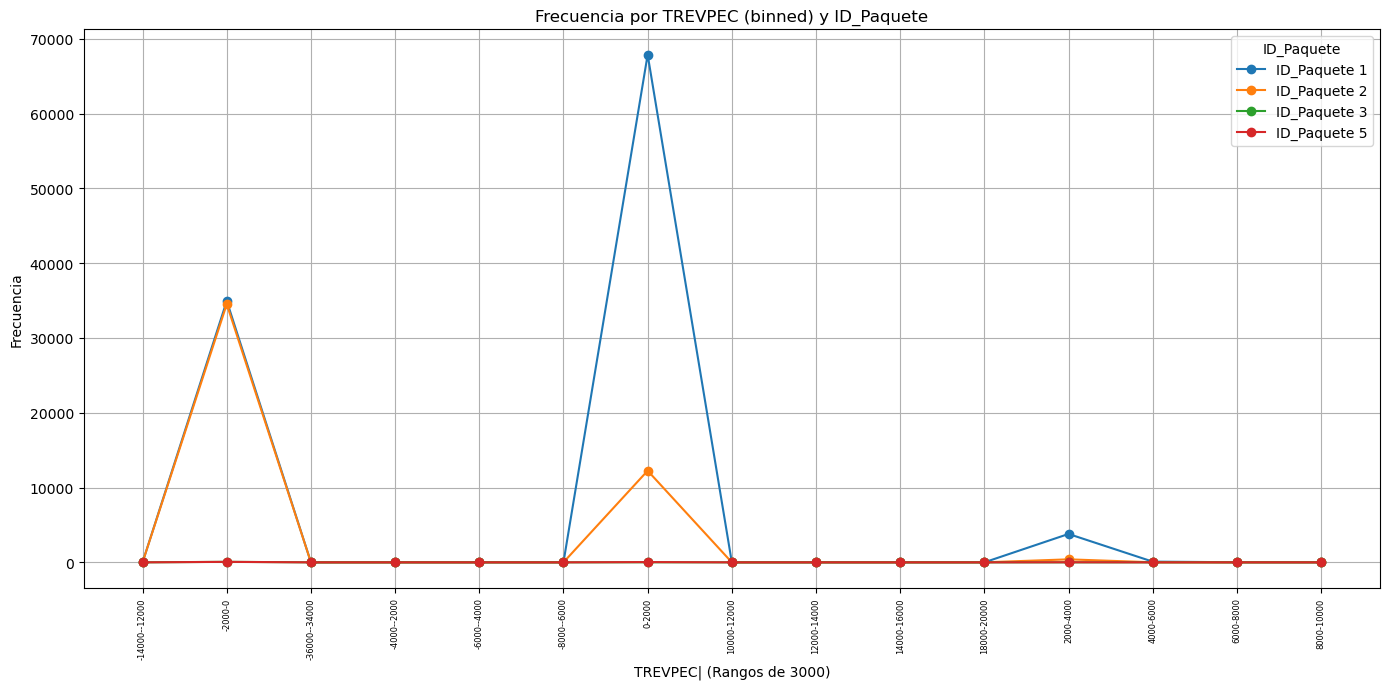

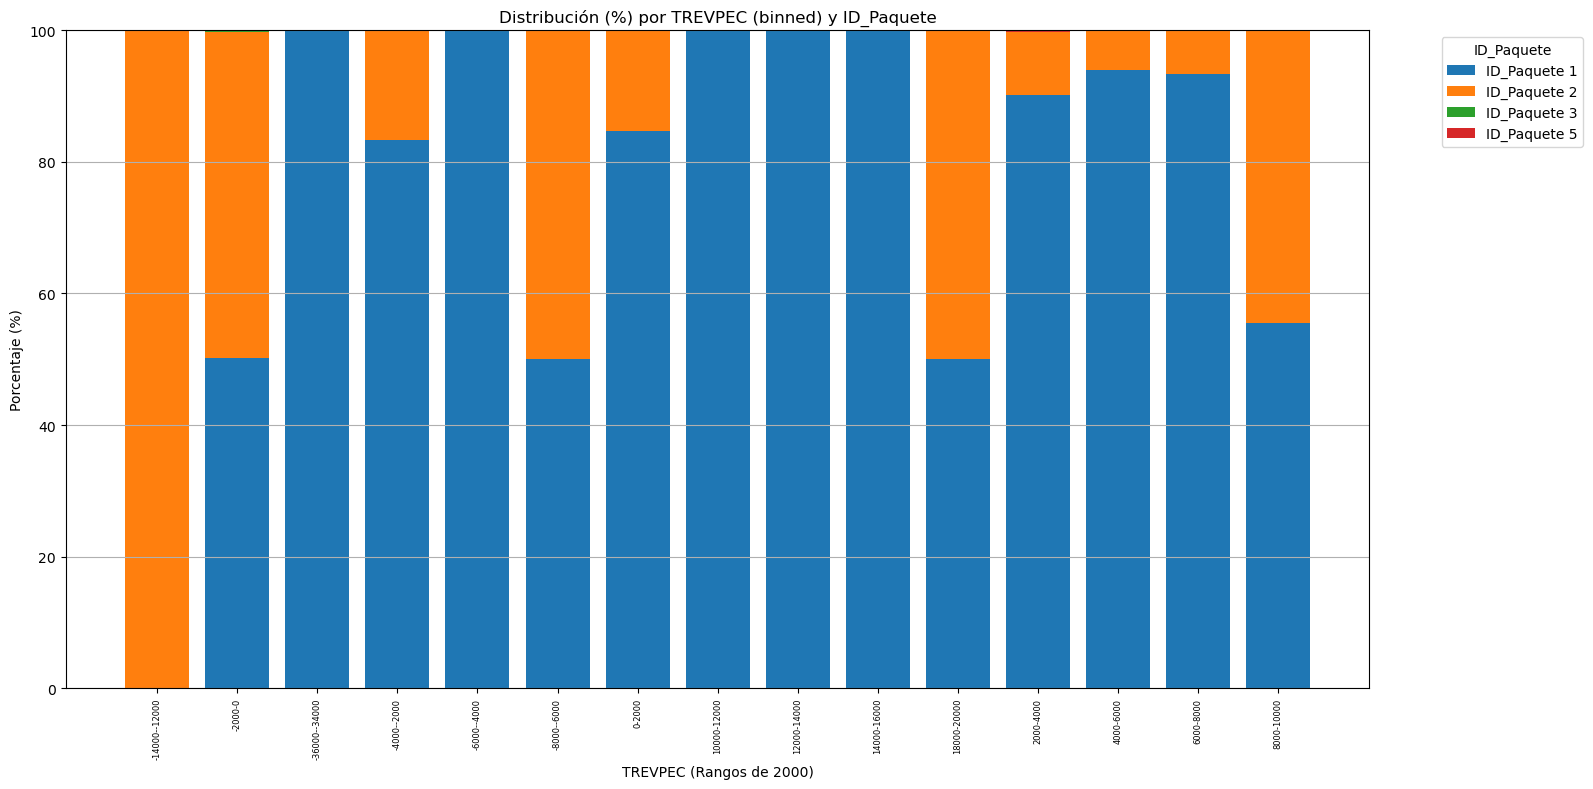

In [37]:
adr_cols = [float(x.strip('# ')) for x in tablas2["TREVPEC"].columns]
min_value = int(min(adr_cols))  
max_value = int(max(adr_cols))
start = (min_value // 2000) * 2000
end = ((max_value // 2000) + 1) * 2000
bins = list(range(start, end + 2000, 2000))  # +3000 para incluir el último
bin_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
adr_bins = pd.cut(adr_cols, bins=bins, labels=bin_labels, include_lowest=True)
bin_mapping = dict(zip(tablas2["TREVPEC"].columns, adr_bins))
tab_binned = tablas2["TREVPEC"].copy()
tab_binned.columns = [bin_mapping[col] for col in tab_binned.columns]
tab_binned = tab_binned.groupby(level=0, axis=1).sum()
plt.figure(figsize=(14, 7))
for idx, row in tab_binned.iterrows():
    plt.plot(tab_binned.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por TREVPEC (binned) y ID_Paquete')
plt.xlabel('TREVPEC| (Rangos de 3000)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tabla_percent = tab_binned.div(tab_binned.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por TREVPEC (binned) y ID_Paquete')
plt.xlabel('TREVPEC (Rangos de 2000)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


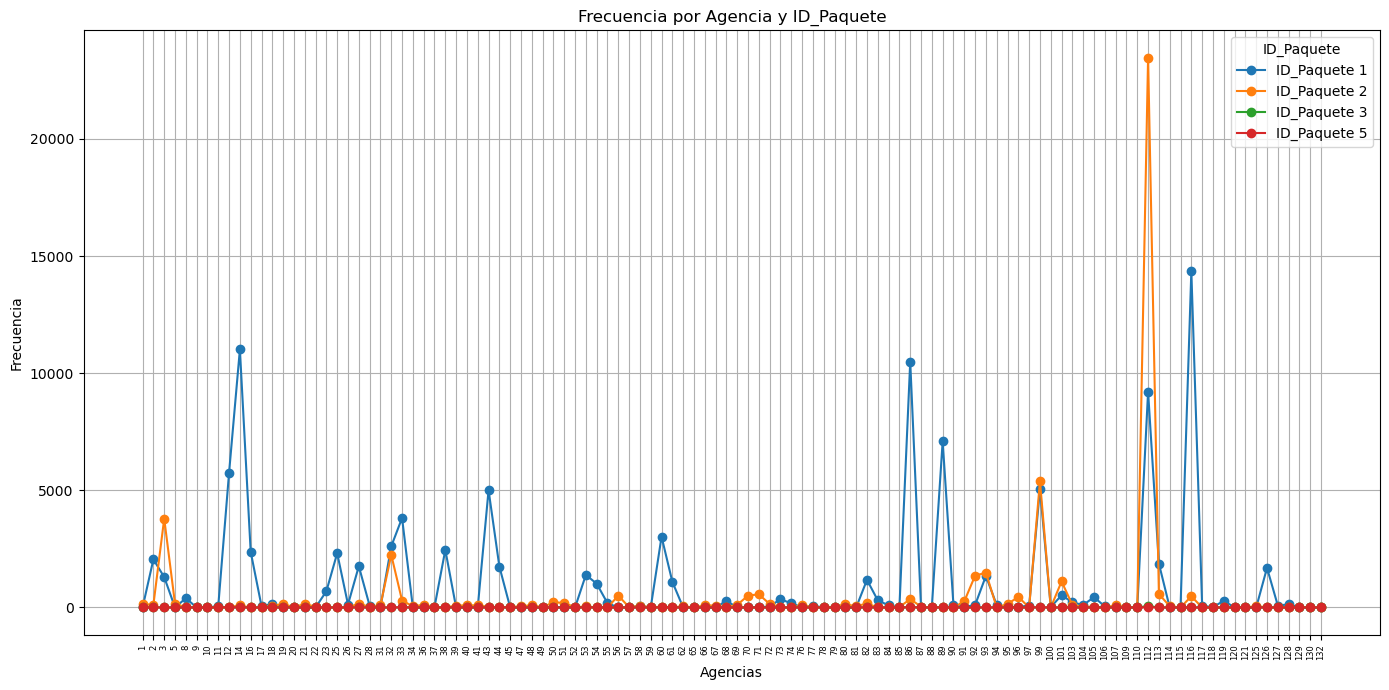

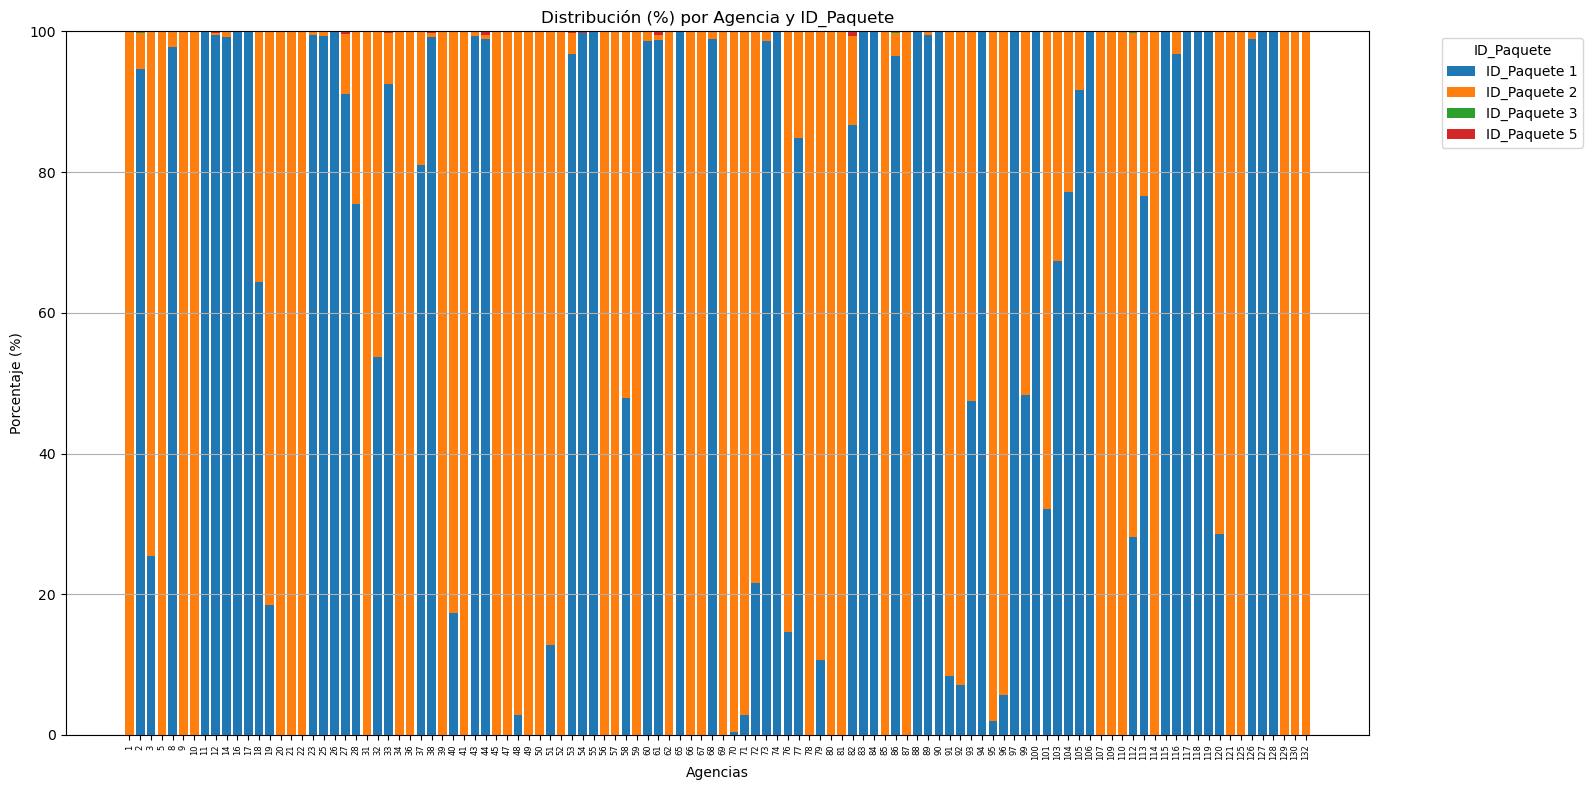

In [38]:
tab= tablas2["ID_Agencia"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
plt.figure(figsize=(14, 7))
for idx, row in tab.iterrows():
    plt.plot(tab.columns, row.values, marker='o', label=f'ID_Paquete {idx}')
plt.title('Frecuencia por Agencia y ID_Paquete')
plt.xlabel('Agencias')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete')
plt.grid(True)
plt.tight_layout()
plt.show()
tab = tablas2["ID_Agencia"]
tab = tab.reindex(sorted(tab.columns, key=lambda x: int(x.strip('# '))), axis=1)
tabla_percent = tab.div(tab.sum(axis=0), axis=1) * 100
plt.figure(figsize=(16, 8))
bottoms = pd.Series([0]*tabla_percent.shape[1], index=tabla_percent.columns)
for idx, row in tabla_percent.iterrows():
    plt.bar(tabla_percent.columns, row, bottom=bottoms, label=f'ID_Paquete {idx}')
    bottoms += row
plt.title('Distribución (%) por Agencia y ID_Paquete')
plt.xlabel('Agencias')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='ID_Paquete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()